#  Employee Performance Analysis & Prediction Project by Shromana Majumder 7.04.24



## EXPLOTARY DATA ANALYSIS :


#### IMPORTING NECESSARY LIBRARY:

In [4]:
!pip install xlrd

  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.5 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 501.7 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

C:\Users\shromana\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### LOAD DATA FOR EXPLOTARY DATA ANALYSIS

In [92]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # To display the all features

#### BASIC CHECKS OF DATA

In [6]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [7]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [8]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
data.shape

(1200, 28)

* Dataset contain total 28 features with 1 unique feature and 1200 observation.

### EXAMINE THE DATA

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

* In this data two type of data is available [int64, object]

### STATISTICAL MEASURE OF DATA

In [11]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


* In numerical features no constant column is present.

In [12]:
data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


* In categorical data also no constant column is present.

### DEPARTMENT WISE PERFORMANCE RATING

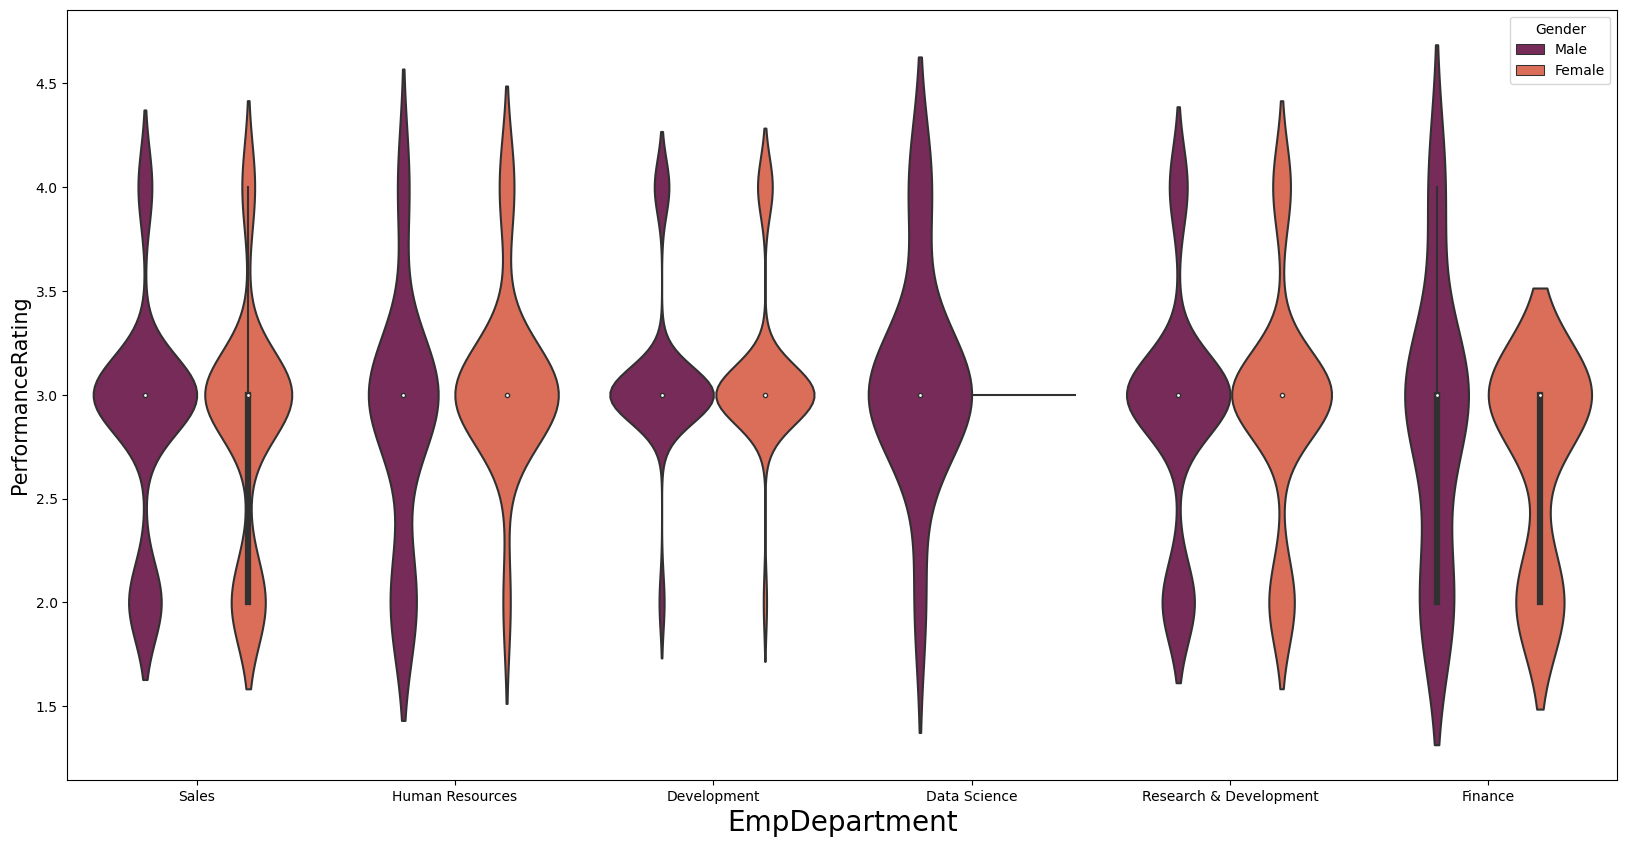

In [13]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='rocket')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

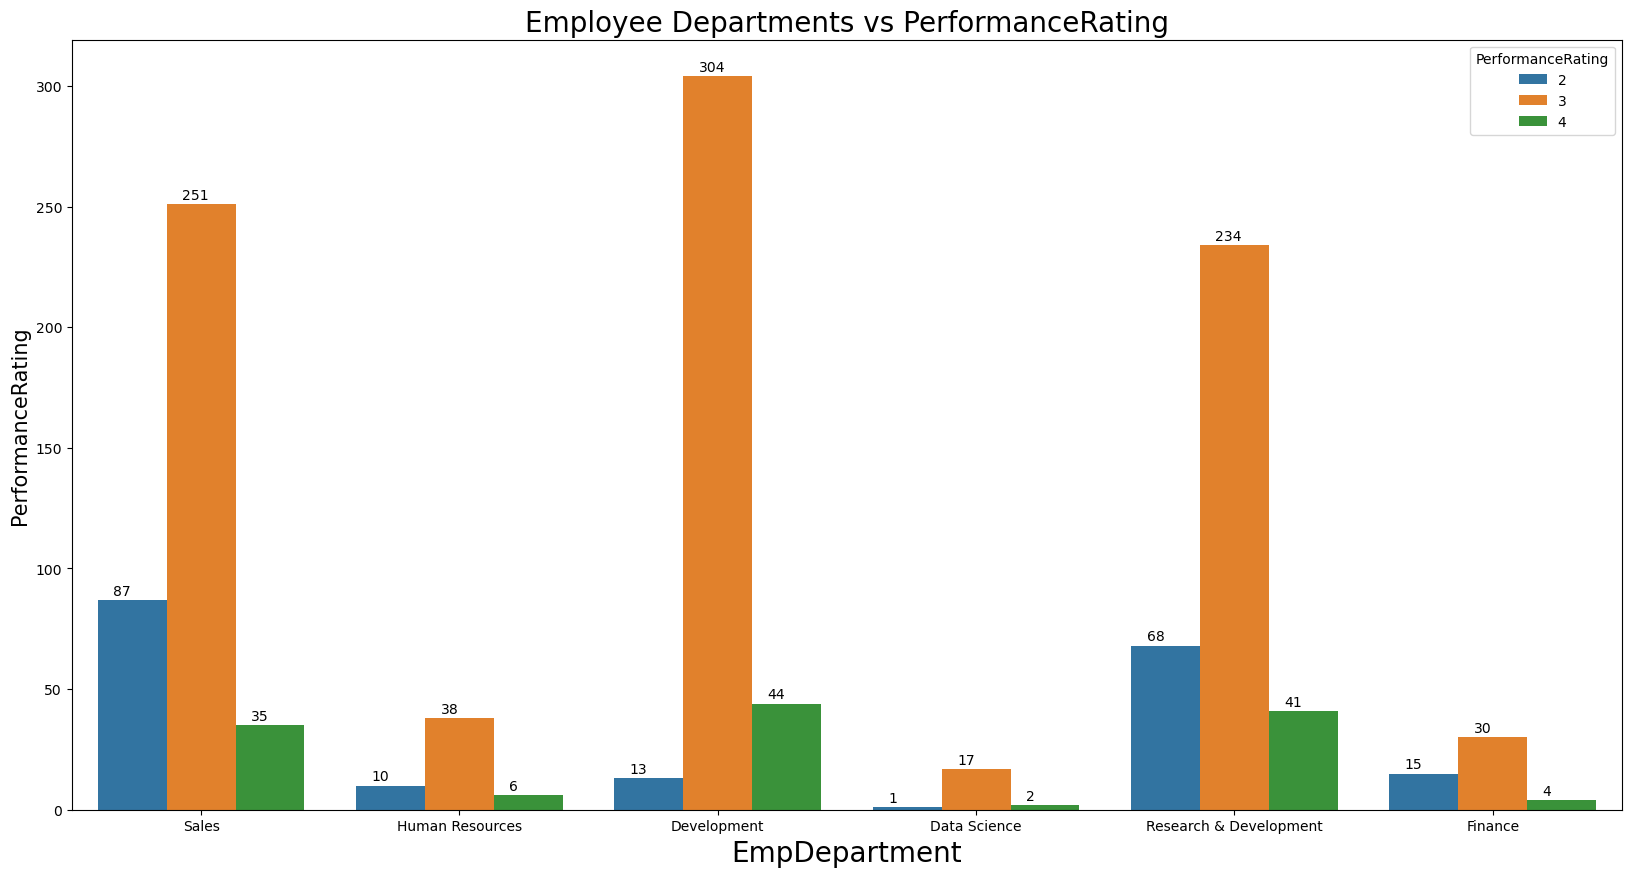

In [14]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


**Observation:**

* From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating

* The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

* The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

* The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

* The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

* The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

* The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

#### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [15]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


### TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**The top 3 factor affecting to the employee performance**
1. Emp Environment Satisfaction
2. Emp Last Salary Hike Percent
3. Emp Work Life Balance

## Employee Enviorment Satisfaction

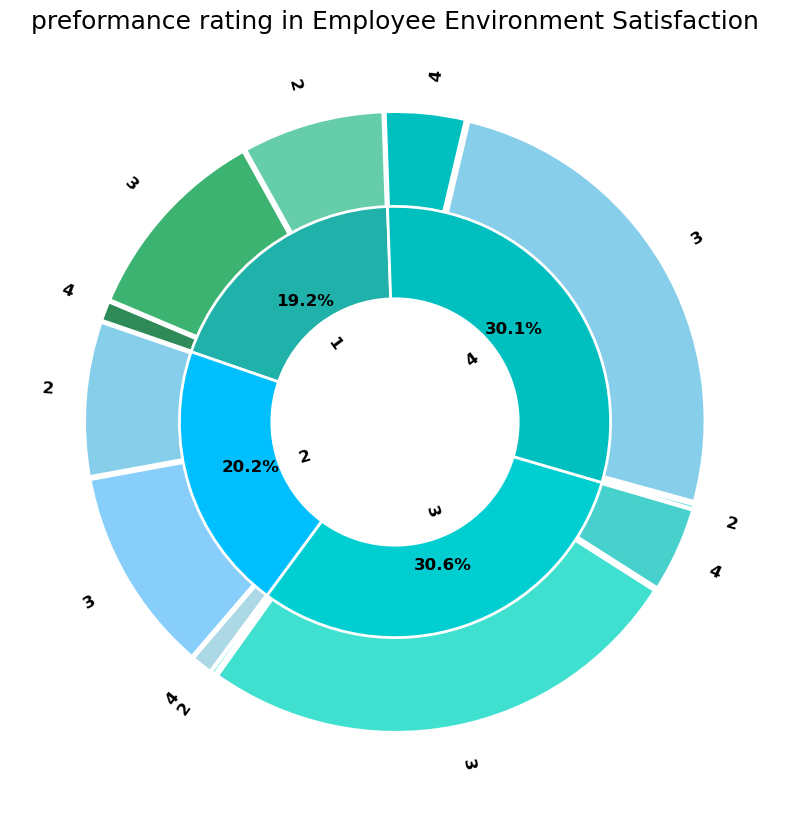

In [16]:
plt.figure(figsize=(20,10))
plt.title("preformance rating in Employee Environment Satisfaction",fontsize=18)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        colors=["mediumaquamarine","mediumseagreen","seagreen",
                "skyblue","lightskyblue",'lightblue',
                'turquoise','turquoise','mediumturquoise',
                'c','skyblue','c',
               ],explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.82, textprops = {"fontsize":12,"fontweight":"bold"},startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))

plt.pie([230,242,367,361], radius=0.7,
        colors=['lightseagreen','deepskyblue',"darkturquoise","c"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True,startangle=92)
plt.show()


## Employee Last Salary Hike Percent

In [17]:

pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


## Employee Work Life Balance

In [18]:
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


**Observation:**

 
* Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.


* More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
* Employees whose salary hike percentage is in between 20-22%, There performance rating is 4


* In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees


## UNIVARIATE ANALYSIS

#### Age

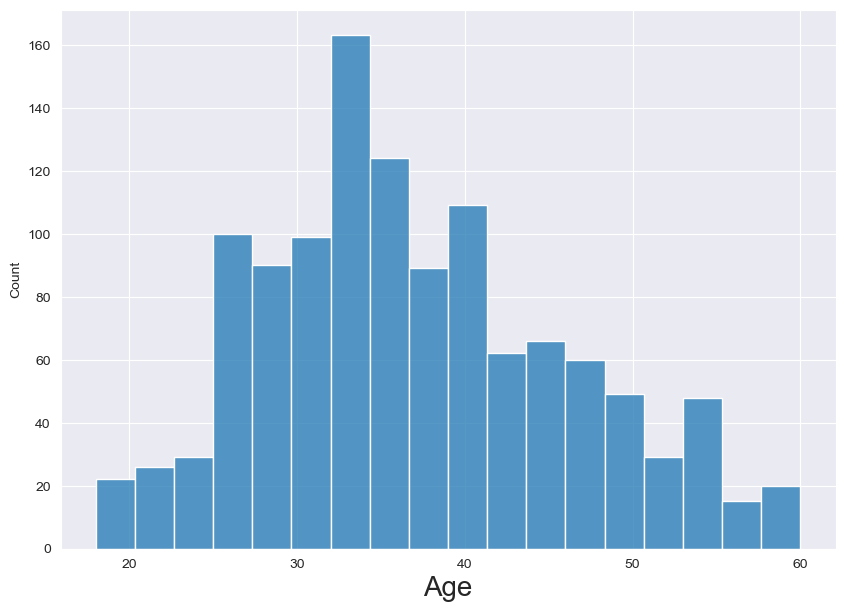

In [93]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=data)
plt.xlabel('Age',fontsize=20)
plt.show()

* The range of age between 18 to 60, most of the employee age between 25 to 40.

#### Employee Hourly Rate

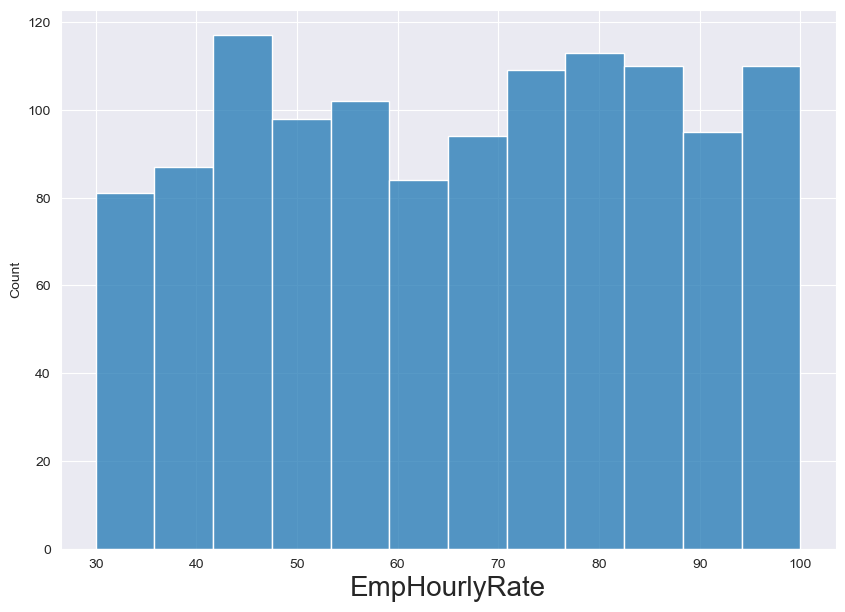

In [94]:
plt.figure(figsize=(10,7))
sns.histplot(x='EmpHourlyRate',data=data)
plt.xlabel('EmpHourlyRate',fontsize=20)
plt.show()

* The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

#### Total Work Experience In Year

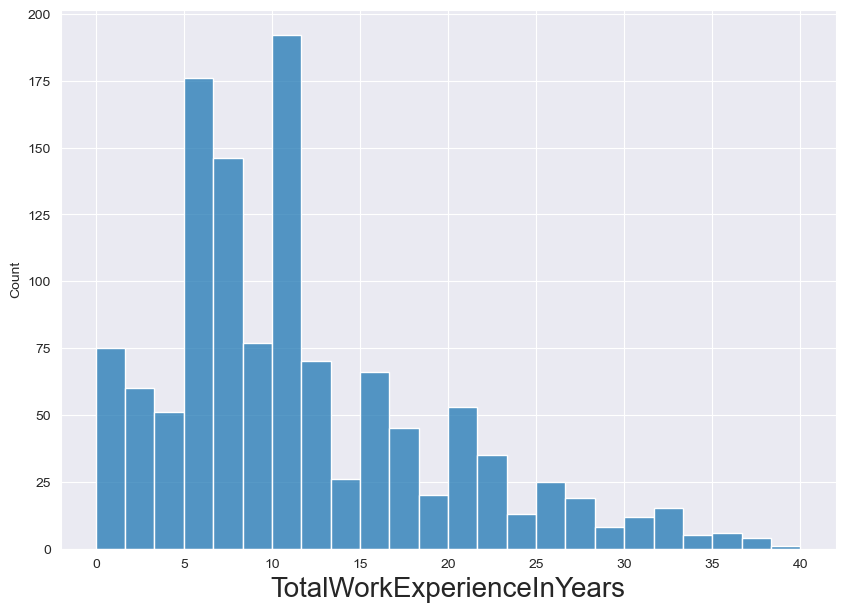

In [95]:
plt.figure(figsize=(10,7))
sns.histplot(x='TotalWorkExperienceInYears',data=data)
plt.xlabel('TotalWorkExperienceInYears',fontsize=20)
plt.show()

* Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

#### Experience Years At This Company

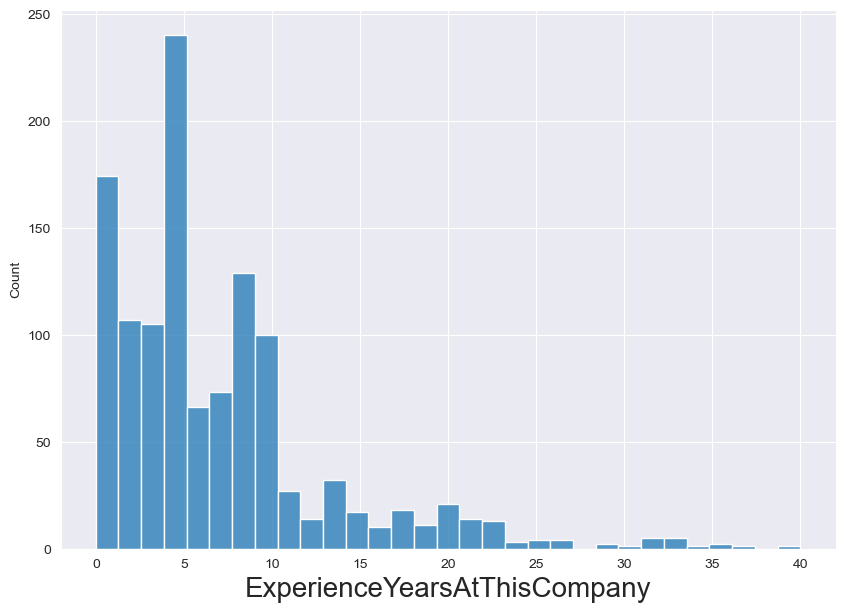

In [97]:
plt.figure(figsize=(10,7))
sns.histplot(x='ExperienceYearsAtThisCompany',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=20)
plt.show()

* The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.

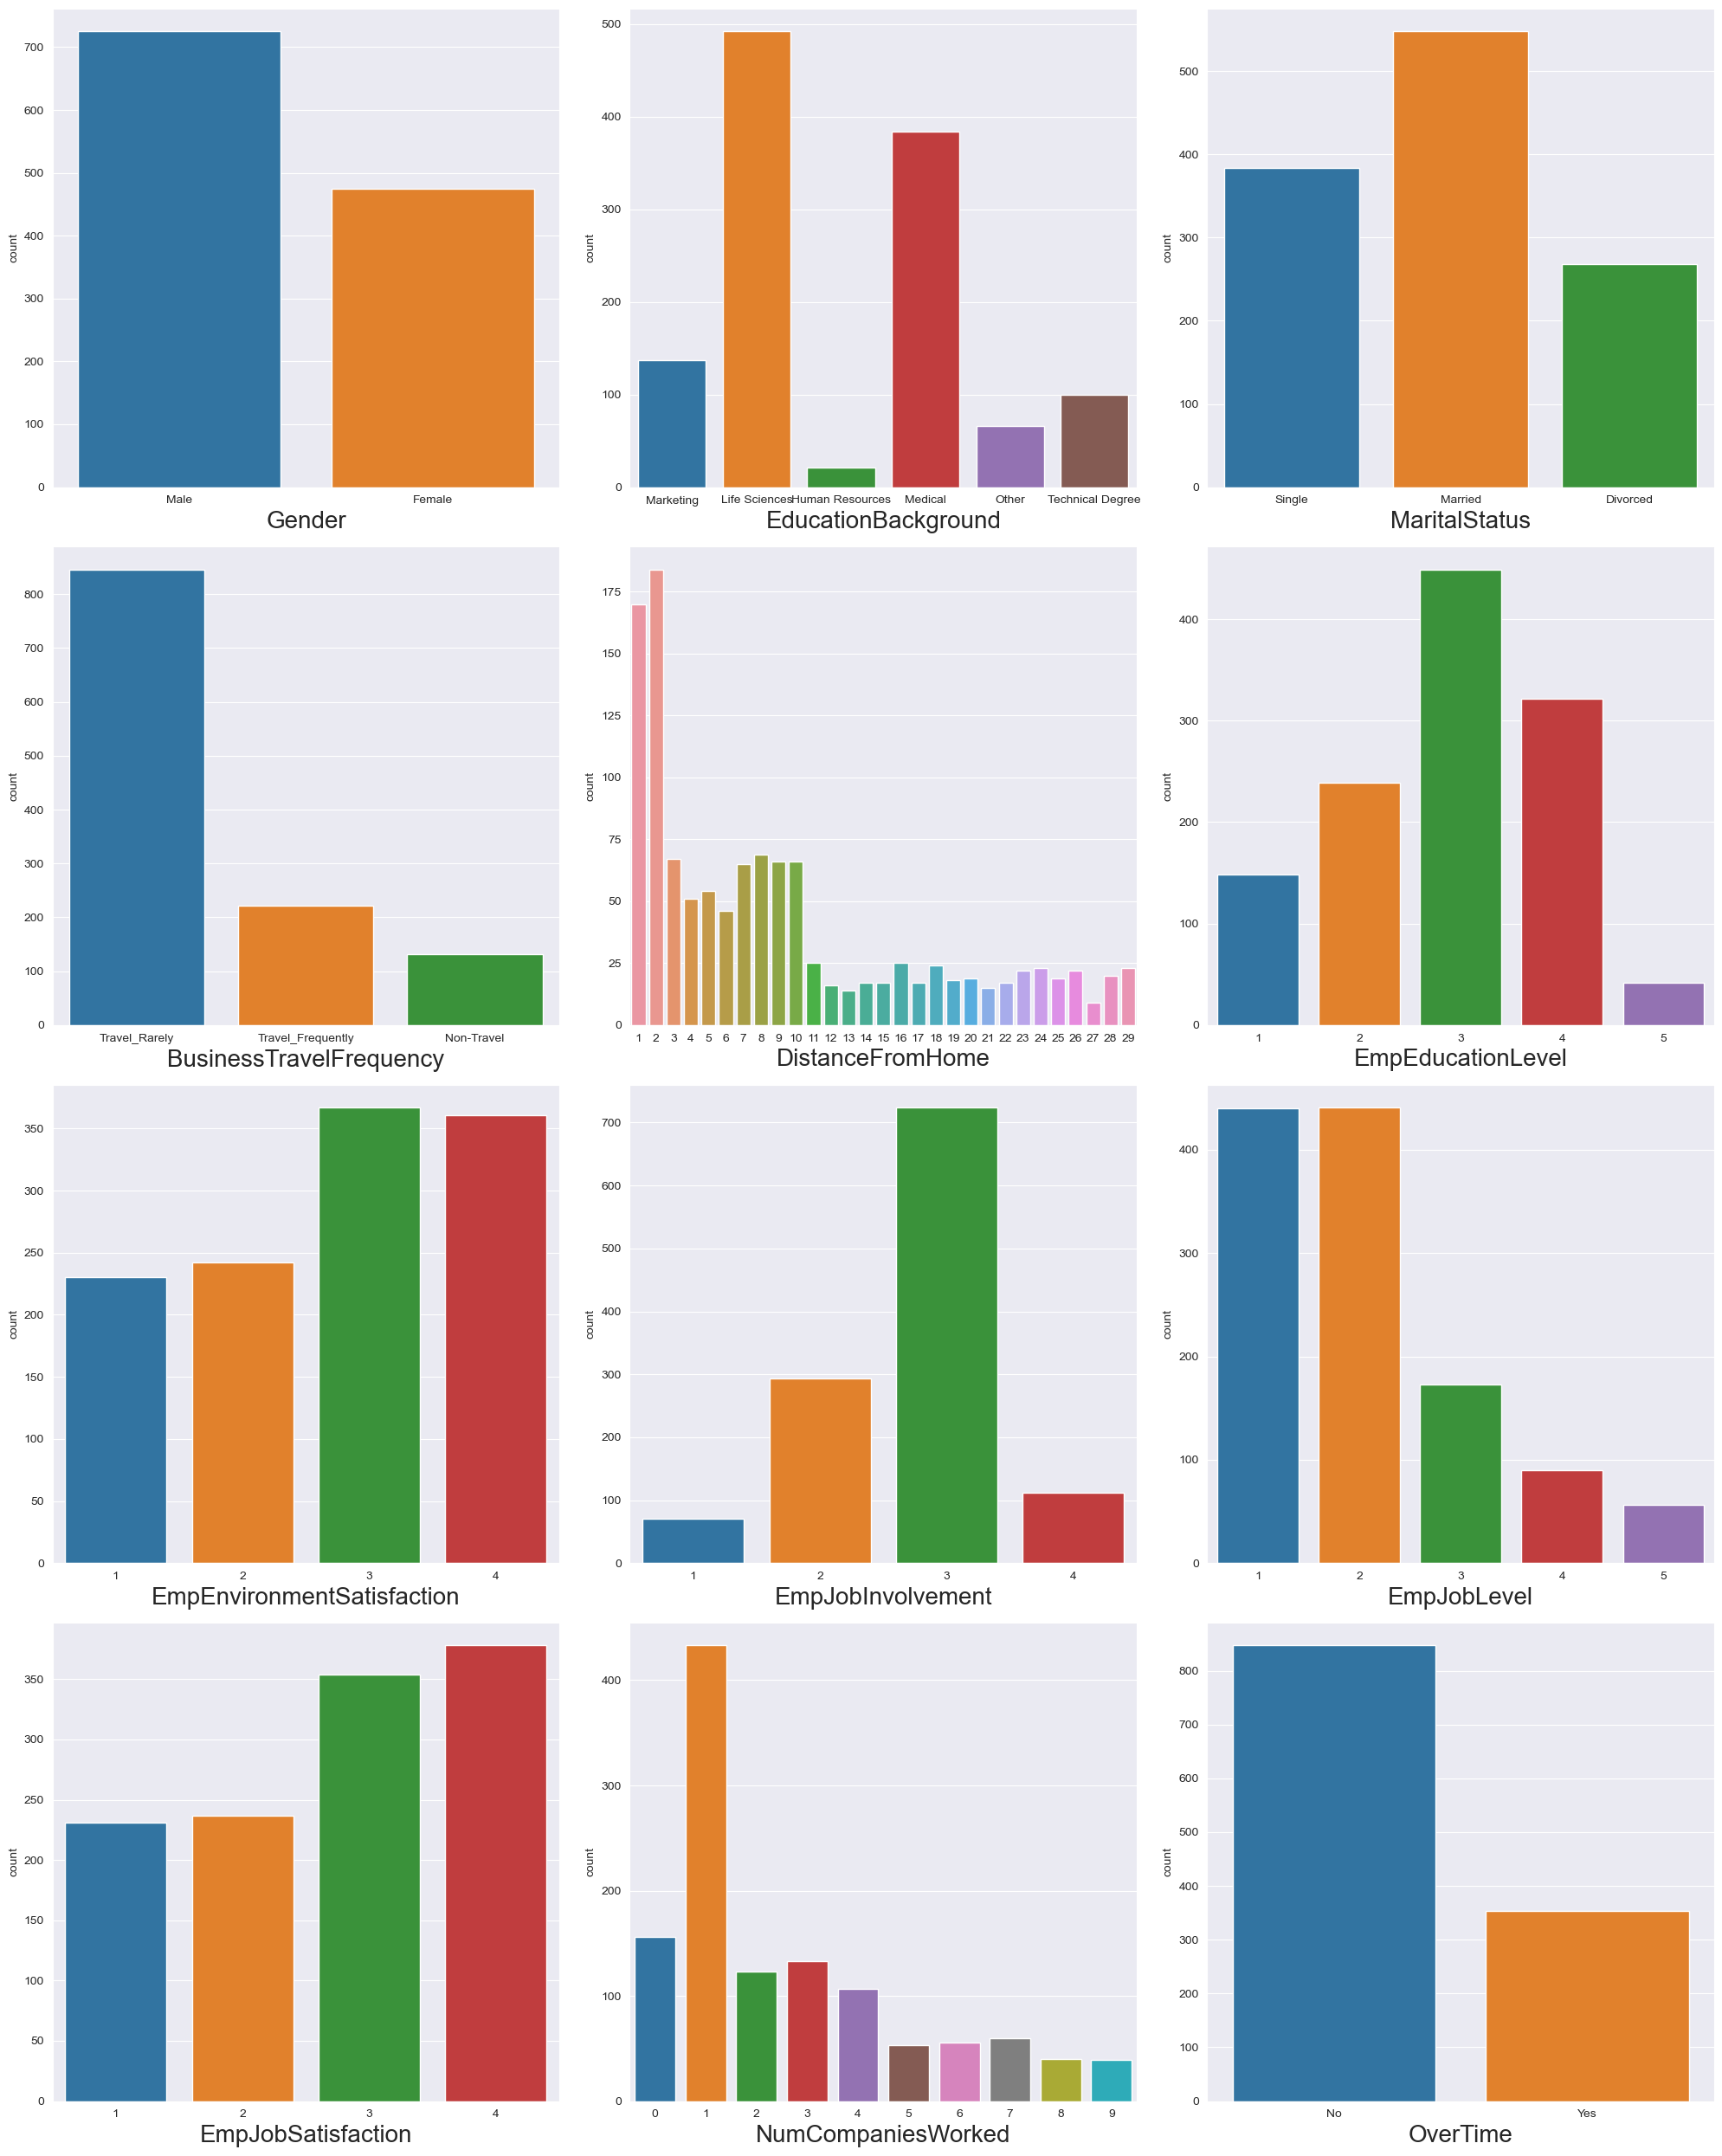

In [99]:
count = data[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] 

plt.figure(figsize=(20,25)) 
plotno = 1 

for column in count:  
    if plotno<=13:  
        plt.subplot(4,3,plotno) 
        sns.countplot(x=count[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 


* Most of the male present in the comapany
* most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100. other eduacation background employee is less than 100.
* Most of the employee is married as well as less than 400 employee is single. less than 300 employee mariatal status is divorced.
* Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently remaining less than 120 employee not travell for buisness purpose.
* The range of distance between home to comapny is 1 to 29. Maximum no of employee home to company distance is less than 10.
* Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4. education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.
* Most of the employee Statisfaction is 3 & 4 , 1 & 2 enviroment satisfaction employee less than 250
* Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300. Remaining 1 and 4 job involvment employee is less than 100.
* The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2. Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.
* Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.
* Maximum no of employee work with only one company. less no of employee work in more than 5 companies.
* Most no of employee on doing over time and less than 350 employee doing overtime in company.

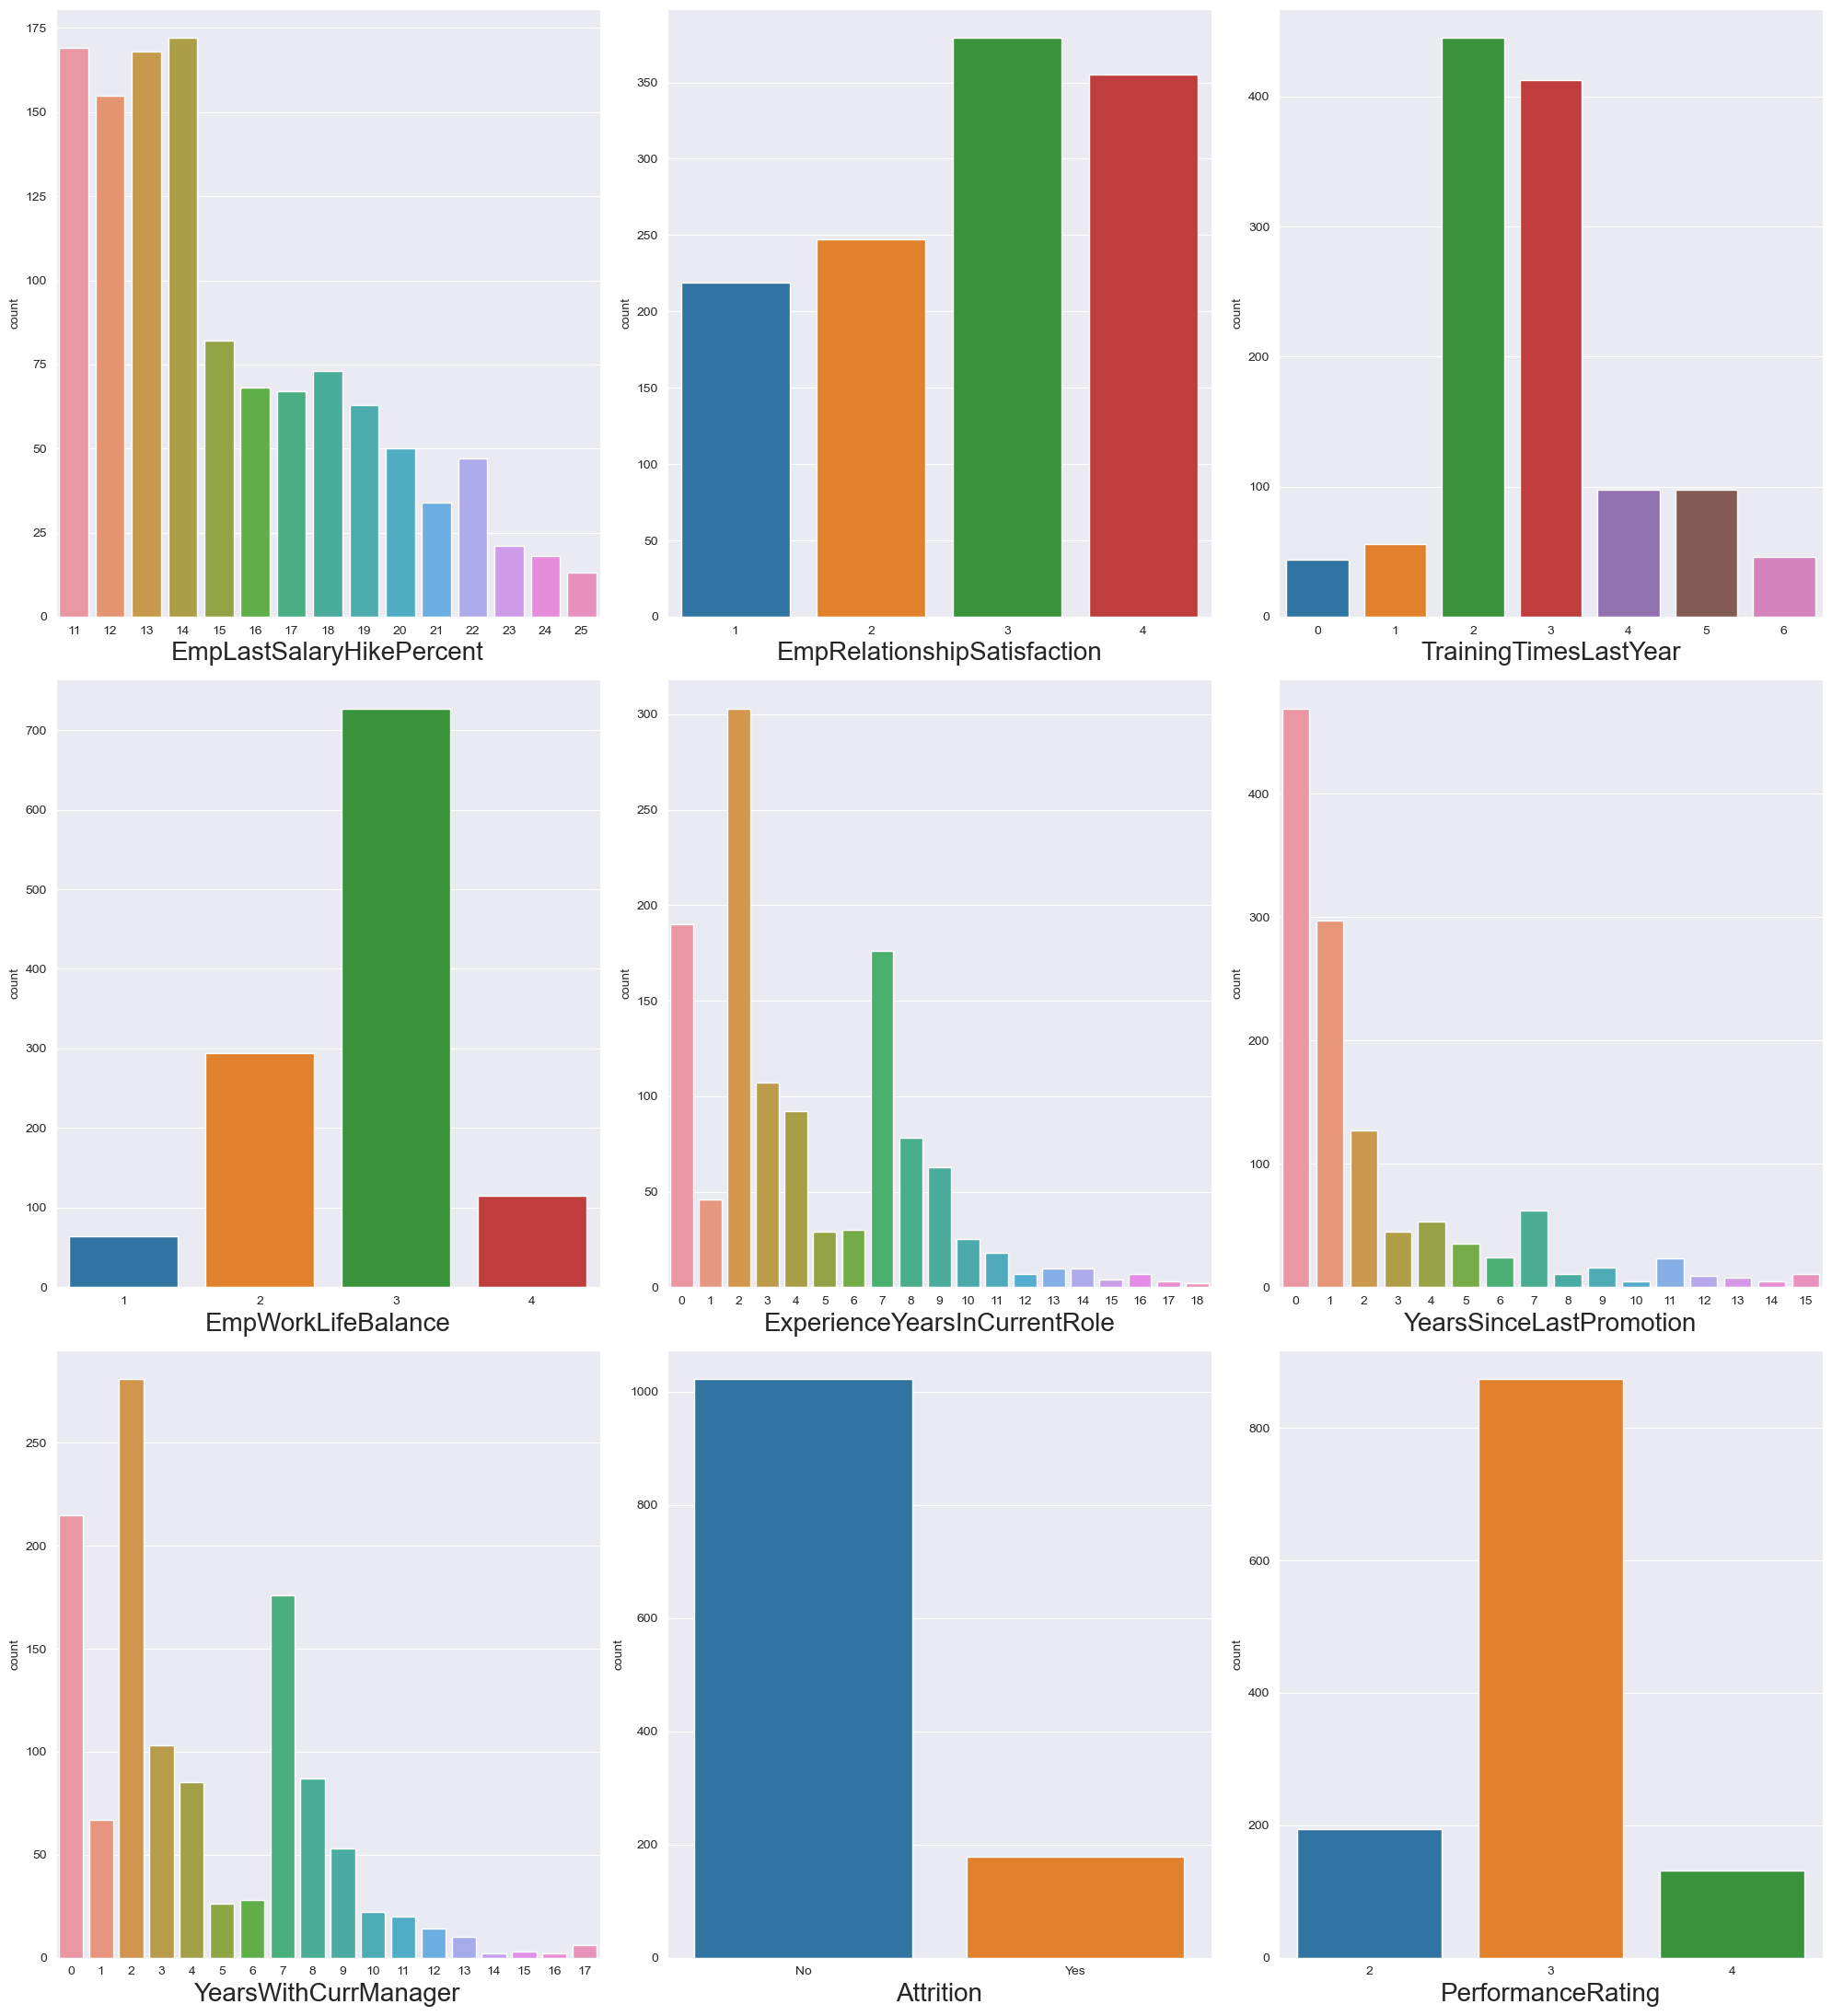

In [100]:
count2 = data[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']] 

plt.figure(figsize=(20,22))
plotno = 1 

for column in count2: 
    if plotno<=10:    
        plt.subplot(3,3,plotno) 
        sns.countplot(x=count2[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show()

* Most no of employee salary hike percentage between 11 to 14%.total range of salary hike is 11 to 25.
less than 80 employee last salary hike in between 15 to 19.
* The range of employee relationship satisfaction is 1 to 4,Most of the relation satisfaction is 3 & 4 as well as less than 250 employee with 1 & 2 relationship satisfaction.
* The range of training time in last year between 0 to 6, Most of the employee doing 2 & 3 rd time training and remaining all times is less than 100.
* Most most the work life balance is 3 than less than 300 employee work life balance is 2. Minimum work life balance is 1 as well as less than 100 employee work life balance is 4.
* Maximum current role experiance of employee is 18.
* Most of the employee have 2 years of expriance in current role then 7 year of experiance employee is less than 180 less than 200 employee have not current role experiance.
* The range of year since last promotion is 0 to 15. Most of the employee has not promoted in last year less than 300 employee has promoted atleast 1 year.
* Most employee have 2 years with current manager and minimum 16 years with current manager. The range in between 0 to 17 and less than 180 employee has 7 years with current manager.
* Maximum no of employee has not leave the company and less than 200 employee has going to leave the company.
* The range of performance rating is 2 to 4, most of the employee have 3 performance ranting and less performance rating is 4.
less than 200 employee has 2 performance rating.

#### Employee Department

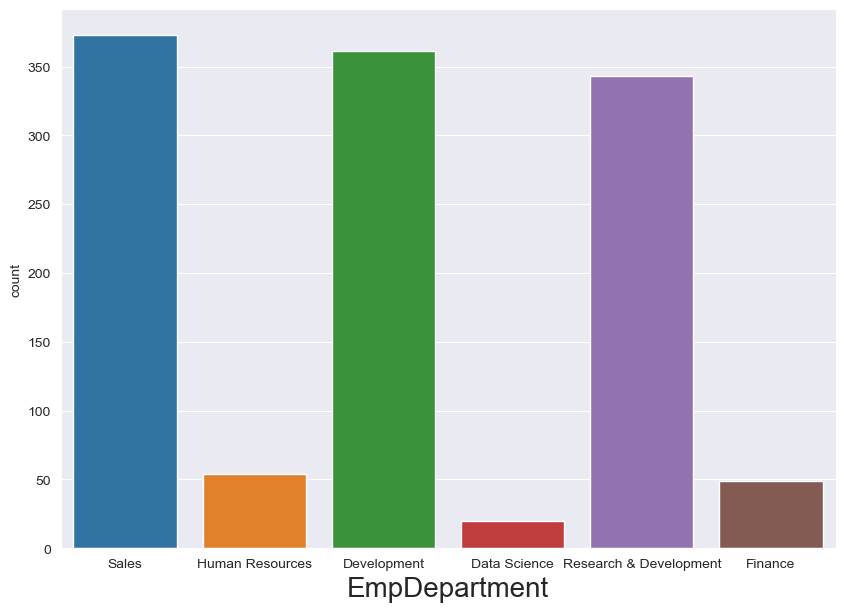

In [102]:
plt.figure(figsize=(10, 7))
sns.countplot(x='EmpDepartment', data=data) 
plt.xlabel('EmpDepartment', fontsize=20)
plt.show()


* Most of the employee from sales department as well as Development and research & Development departmnet employee is less than 320
* Human resources & finance department employee is almost equal.
* Data science employee has minimum in company.

#### Employee Job Role

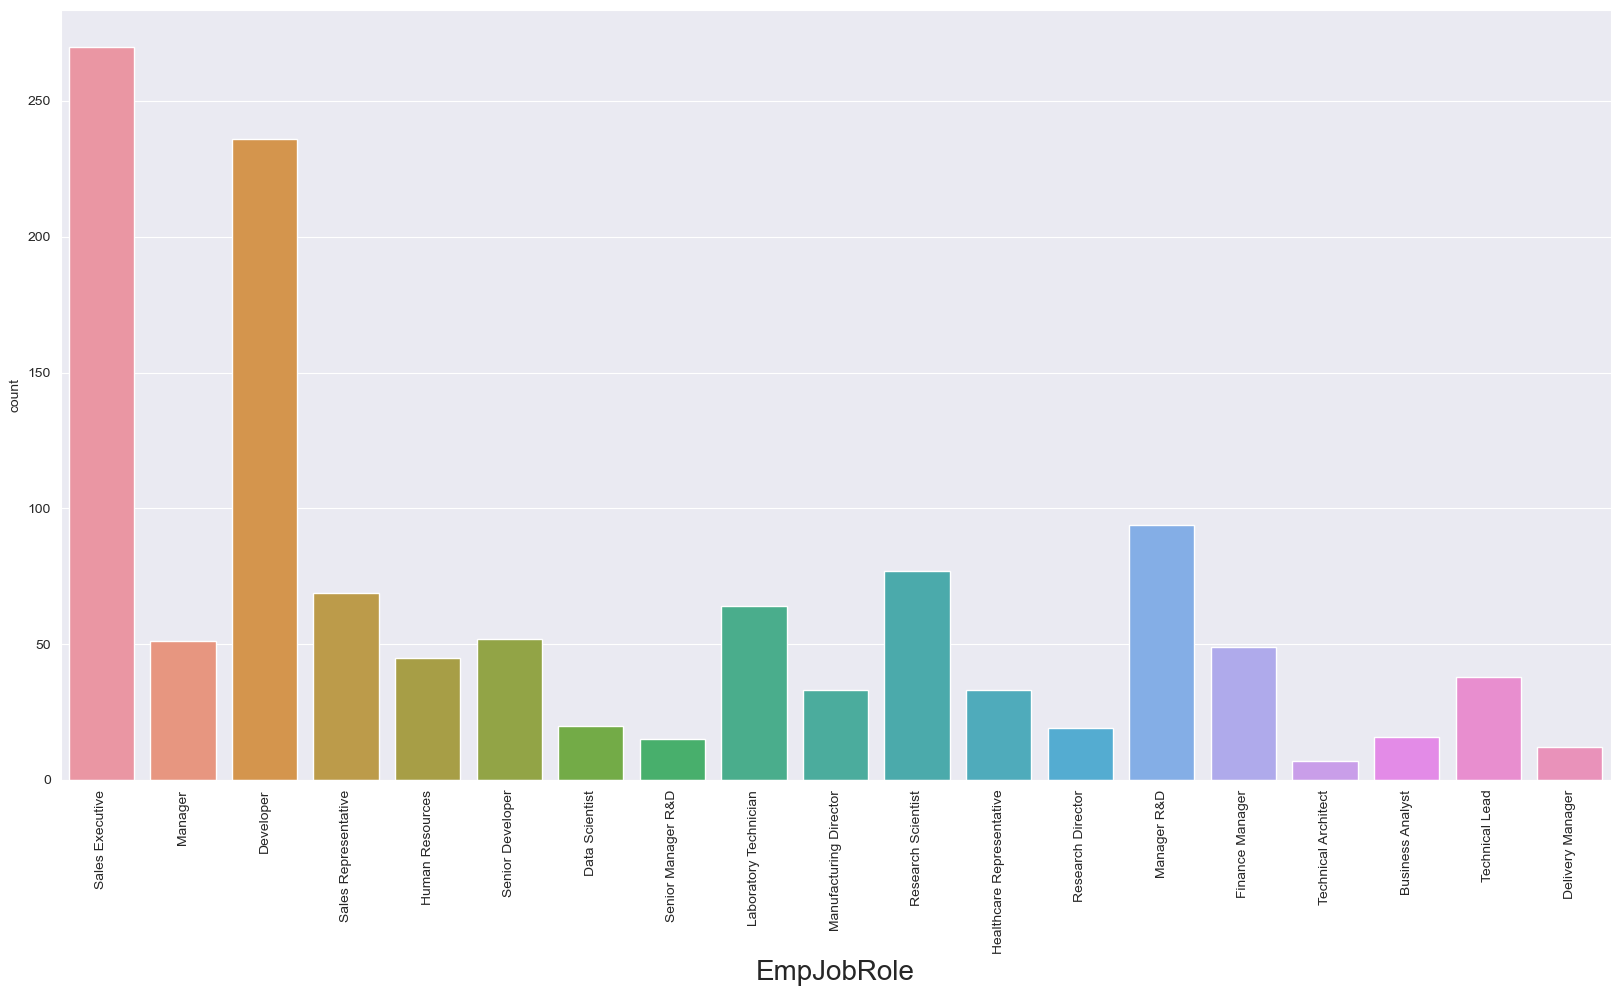

In [103]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

* Sales executive employee job role is maximum as well as Developer job role employee count is 230.
* Manage R& D and research scientist employee is less than 100 and remaining all job role employee is less than 65.

### BIVARIATE ANALYSIS

#### Relation Between age & Experience Years At This Company

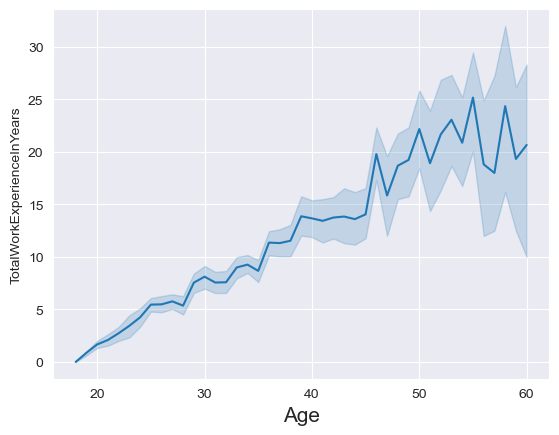

In [104]:
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=15)
plt.show()

* If the age in between 18 to 25 then the total year of experiance is less than 5year.
* If the age is increases that time experiance also increases.

#### Relation Between experiance year at this company & total work experiance

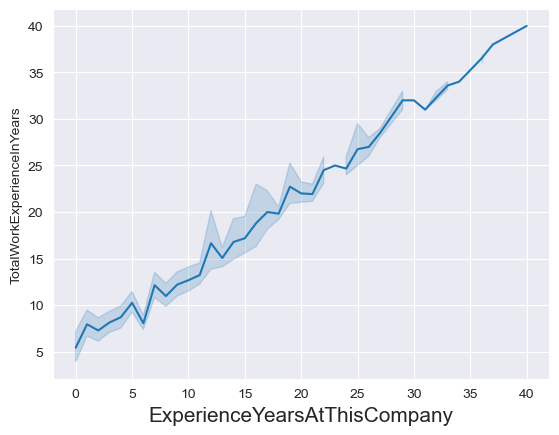

In [105]:
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()


* If the experiance year at this company that time total work experiance also increases.

#### Relation between Employee last salary hike and number of company worked

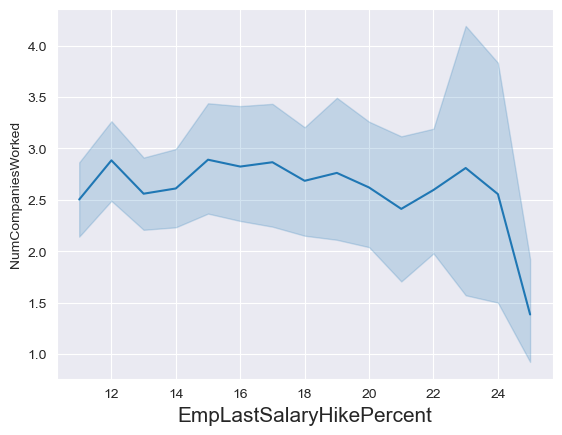

In [106]:
sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

* If the employee has work 1 or 2 company that time employee last salary hike percent is increases.

#### Relation between Years Since Last Promotion and Experience Years In CurrentRole

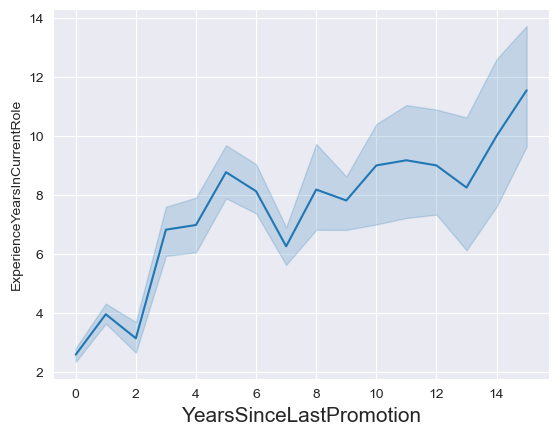

In [107]:
sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data)
plt.xlabel('YearsSinceLastPromotion',fontsize=15)
plt.show()

* In above plot clearly seen that year since last promotion is increases that time employee has more experiance with current role

#### Relation between Employee Hourly Rate and Years With Current Manager

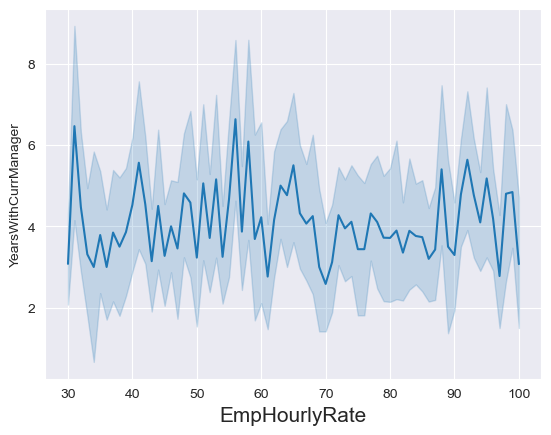

In [108]:
sns.lineplot(x='EmpHourlyRate',y='YearsWithCurrManager',data=data)
plt.xlabel('EmpHourlyRate',fontsize=15)
plt.show()

* most of the employee hourly rate with their current manager is constant,but some of the employees has maximum hourly rate with less no of year with current manager.

#### Relation between Distance From Home and Employee Last Salary Hike Percent

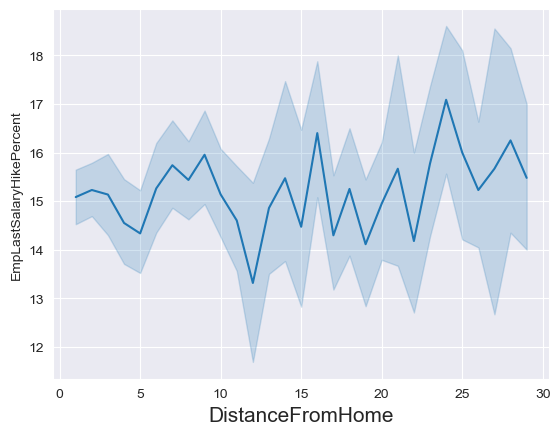

In [109]:
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

* If the distance from home is more then the employee salary hike is slightly increases.
* distance from home between 10 to 13 that time employee salary hike is decreases.

#### CATEGORICAL FEATURES

In [110]:
categorical = []  
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


In [111]:
categorical

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

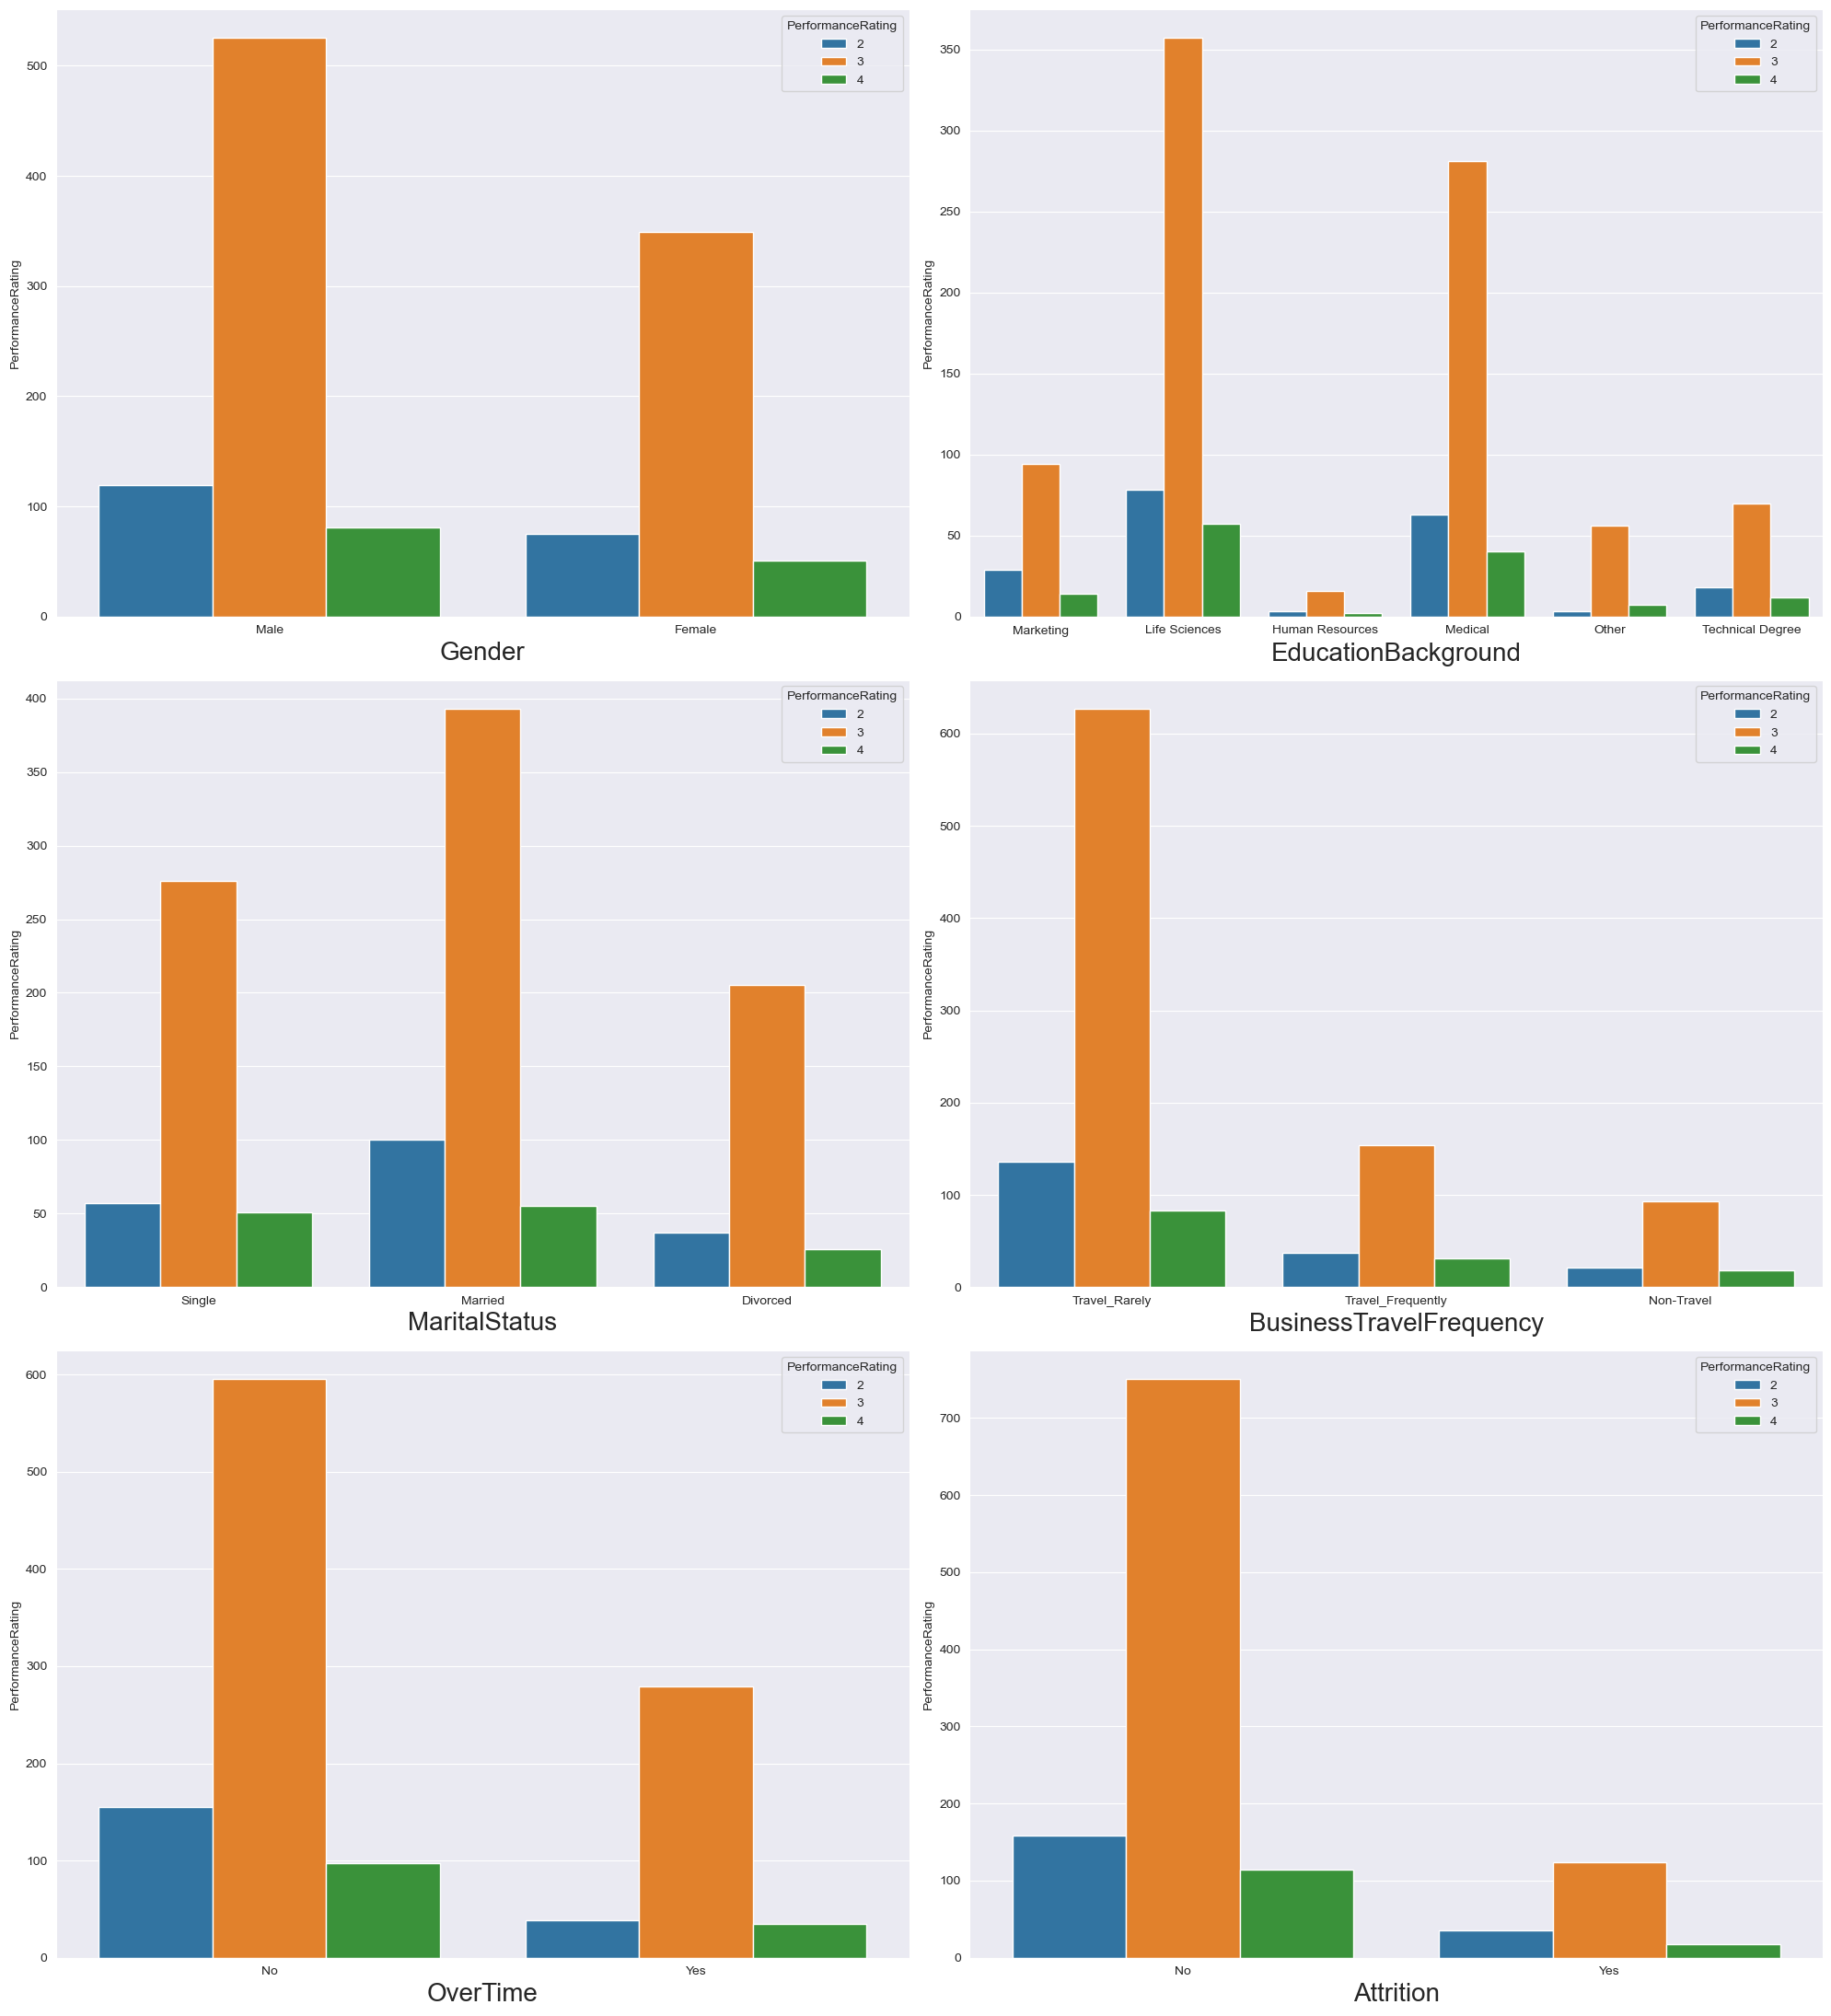

In [112]:
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) 
plotno = 1 

for column in categorical_col: 
    if plotno<=7:   
        plt.subplot(3,2,plotno) 
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)  
        plt.ylabel('PerformanceRating')
    plotno+=1
plt.tight_layout()
plt.show() 

* Maximum no of male rated with 3 performance rating as well as in female also most of the feamle rated with 3 performance rating.
four performance rating in both male & female is less
* Maximum life sciences and medical education background employee rated with 3 performance rating
life science and medical education background employee also rated with 2 & 4 performance rating most of the time
* Most of the married employee rated with 3 performance rating as well as single and divorced marital status employee rated with 3 performance rating most of the time.
In married marital status 2 performance rating emplyee is more than single or divorced.
* Maximum no of travel rarely employee has get 3 performance rating
Those employee travel frequentaly this employee also rated with 2, 3, and 4
* Maximum no of employee with no overtime has rated with 3 perfomance rating
Those employee doing overtime that time 2 & 4 performance rating is constant.
* Most of the employee rated with 3 performance rating in no means(They are not leave the company)
Those employee have 3 performace rating those also leave the company

#### Relationship between employee department and performance rating

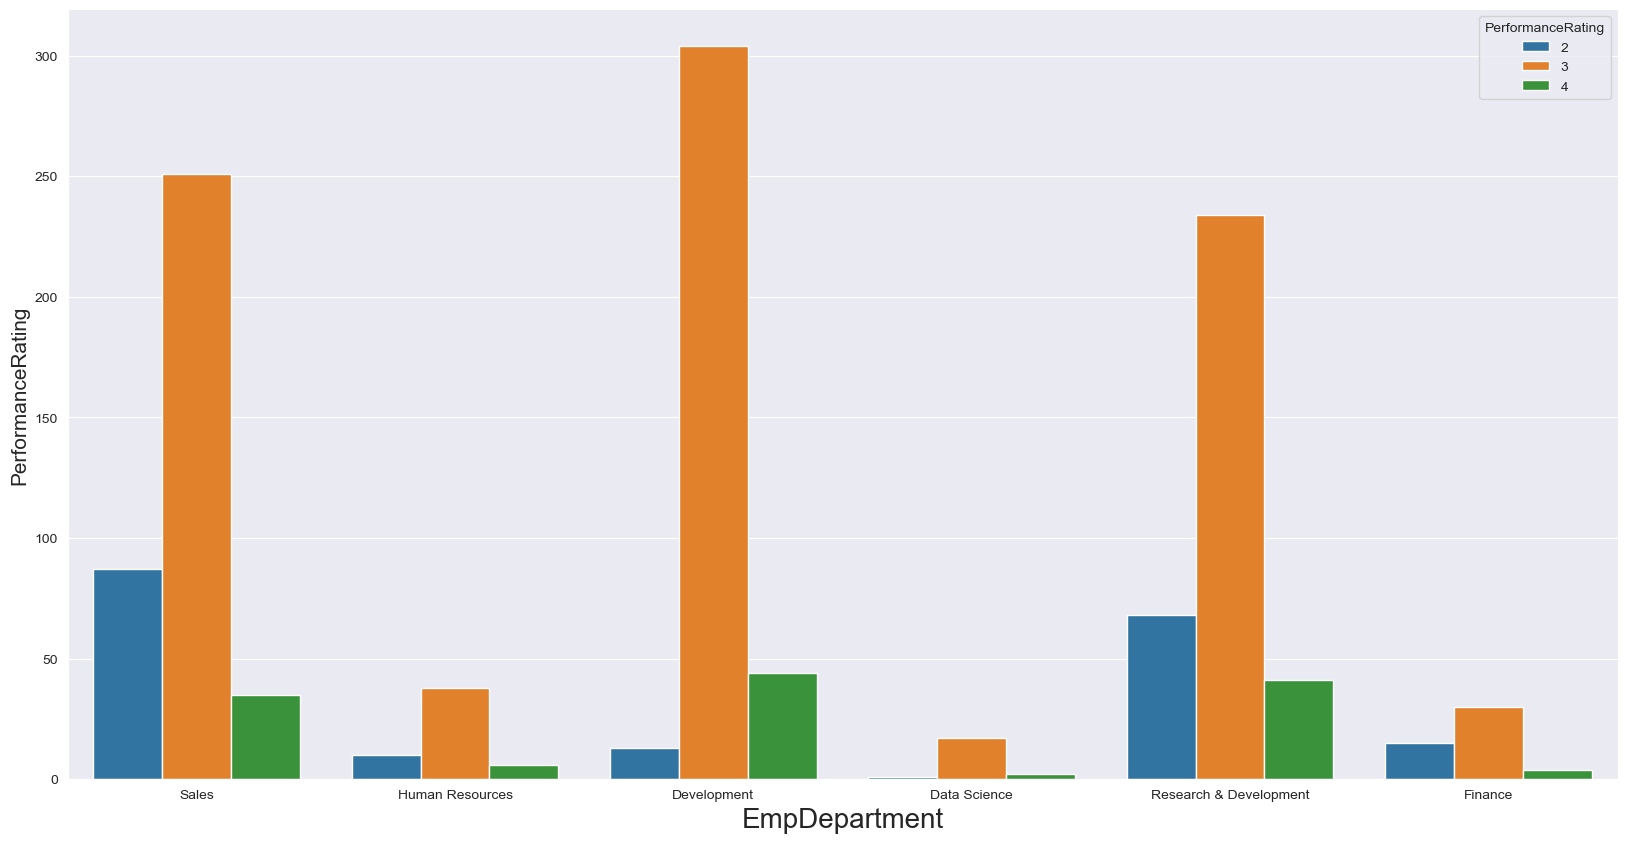

In [114]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

In [146]:
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [147]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [148]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [149]:
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

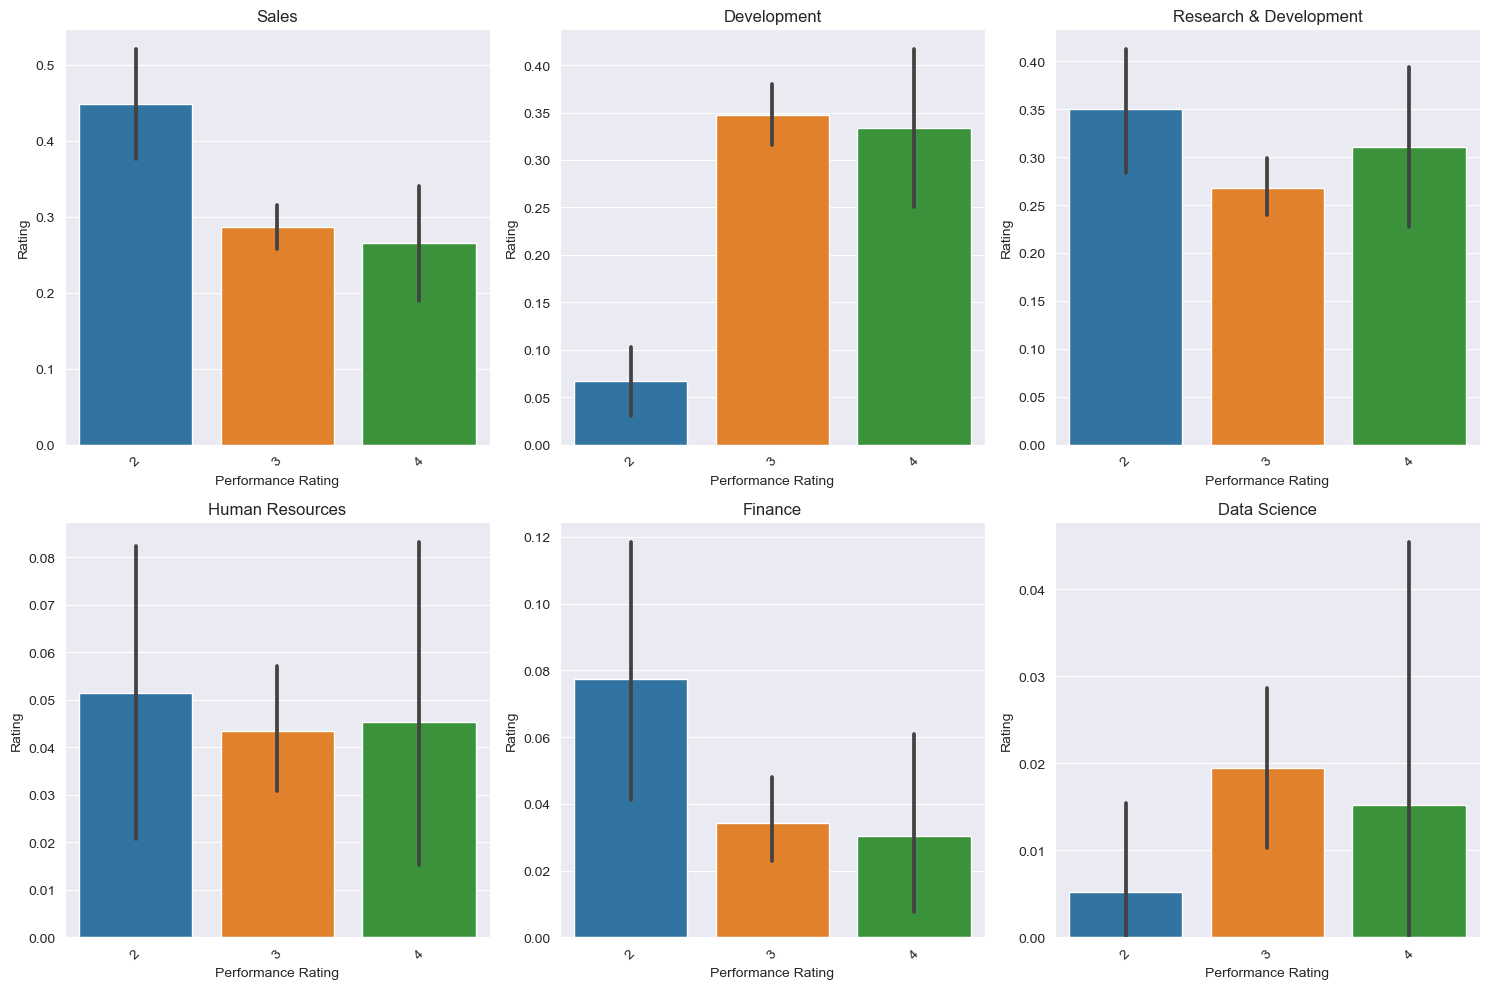

In [151]:
plt.figure(figsize=(15, 10))


departments = ['Sales', 'Development', 'Research & Development', 'Human Resources', 'Finance', 'Data Science']

# Loop through each department and create a subplot
for i, department in enumerate(departments, start=1):
    plt.subplot(2, 3, i)
    sns.barplot(x='PerformanceRating', y=department, data=dept_rating)
    plt.title(department)
    plt.xlabel('Performance Rating')
    plt.ylabel('Rating')
    plt.tight_layout() 
    plt.xticks(rotation=45)  

plt.show()


* Most of the Development, Sales, And Research and development employee department has 3 peformance rating
* Data science department employee has low performance rating.
* In sales & Research and development department also 2 performance rating employee avilable most of the time.

#### Relationship between employee job role and performance rating

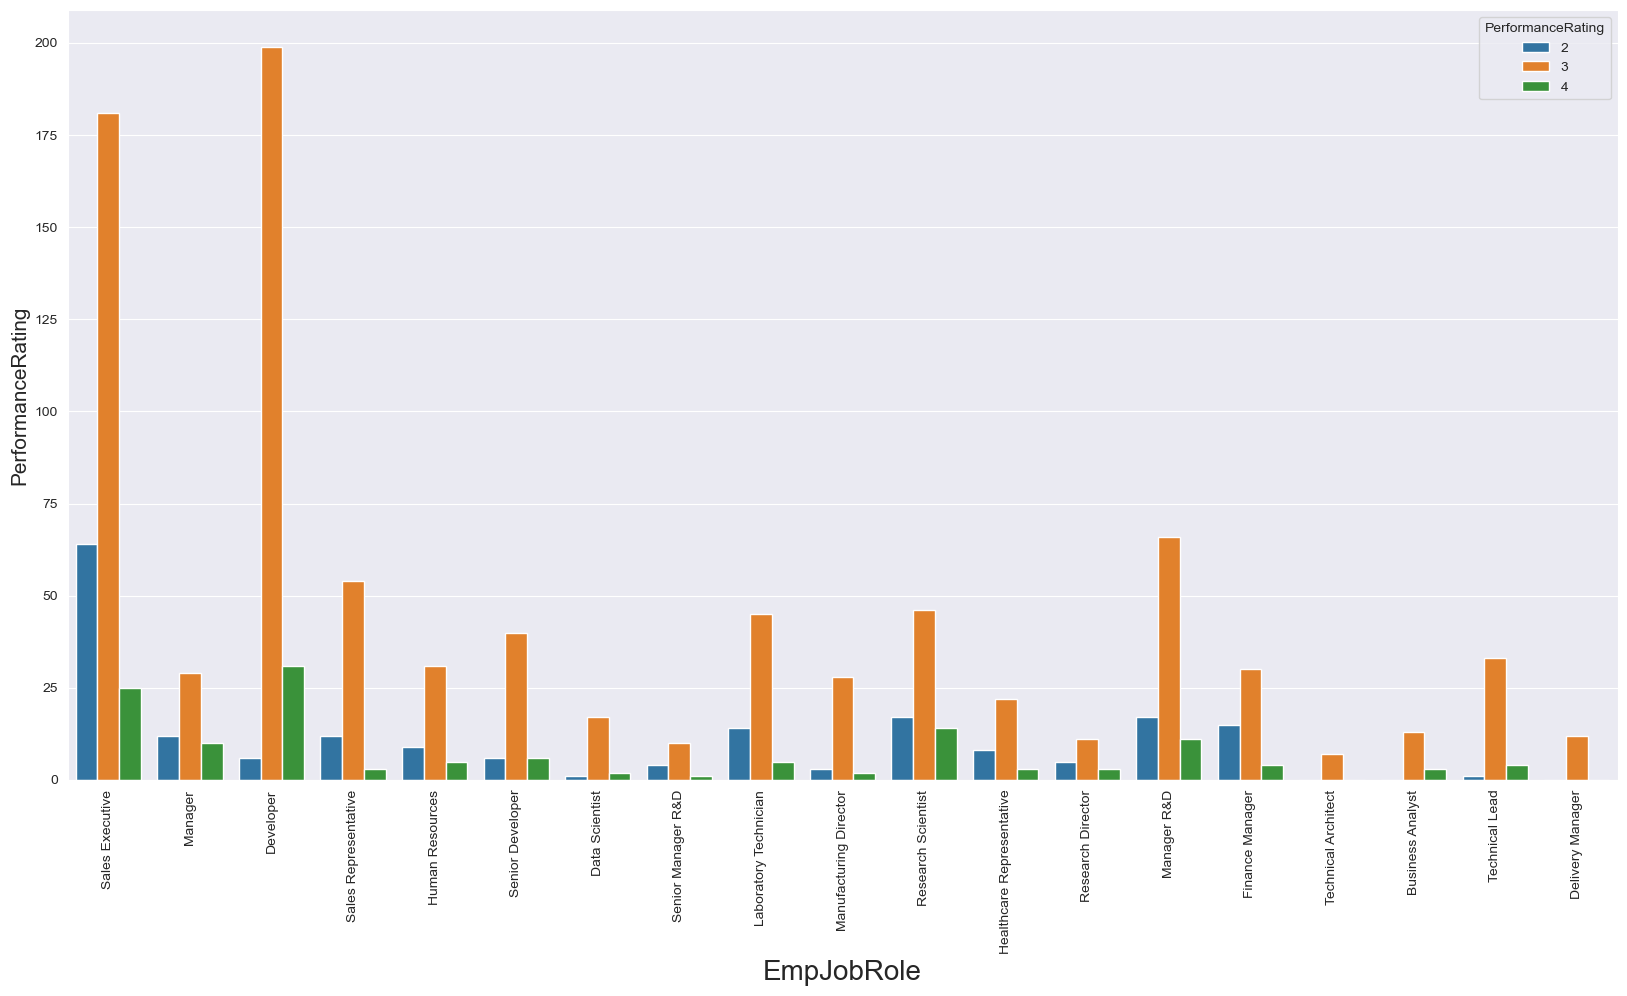

In [115]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',hue=data.PerformanceRating,data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

* Developers and sales executive job role employee performance rating is 3 most of the time.
* In technical architecture and delivery manger job role employee not rated with 2 & 4 performance rating.
* In sales excutive alsso less than 60 employee rated with 2 performance rating.
* Remaining all job role employee has 3 performance rating most of the time.

### NUMERICAL FEATURES

In [116]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].unique()   
        numerical_col.append(column)

In [117]:
numerical_col

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

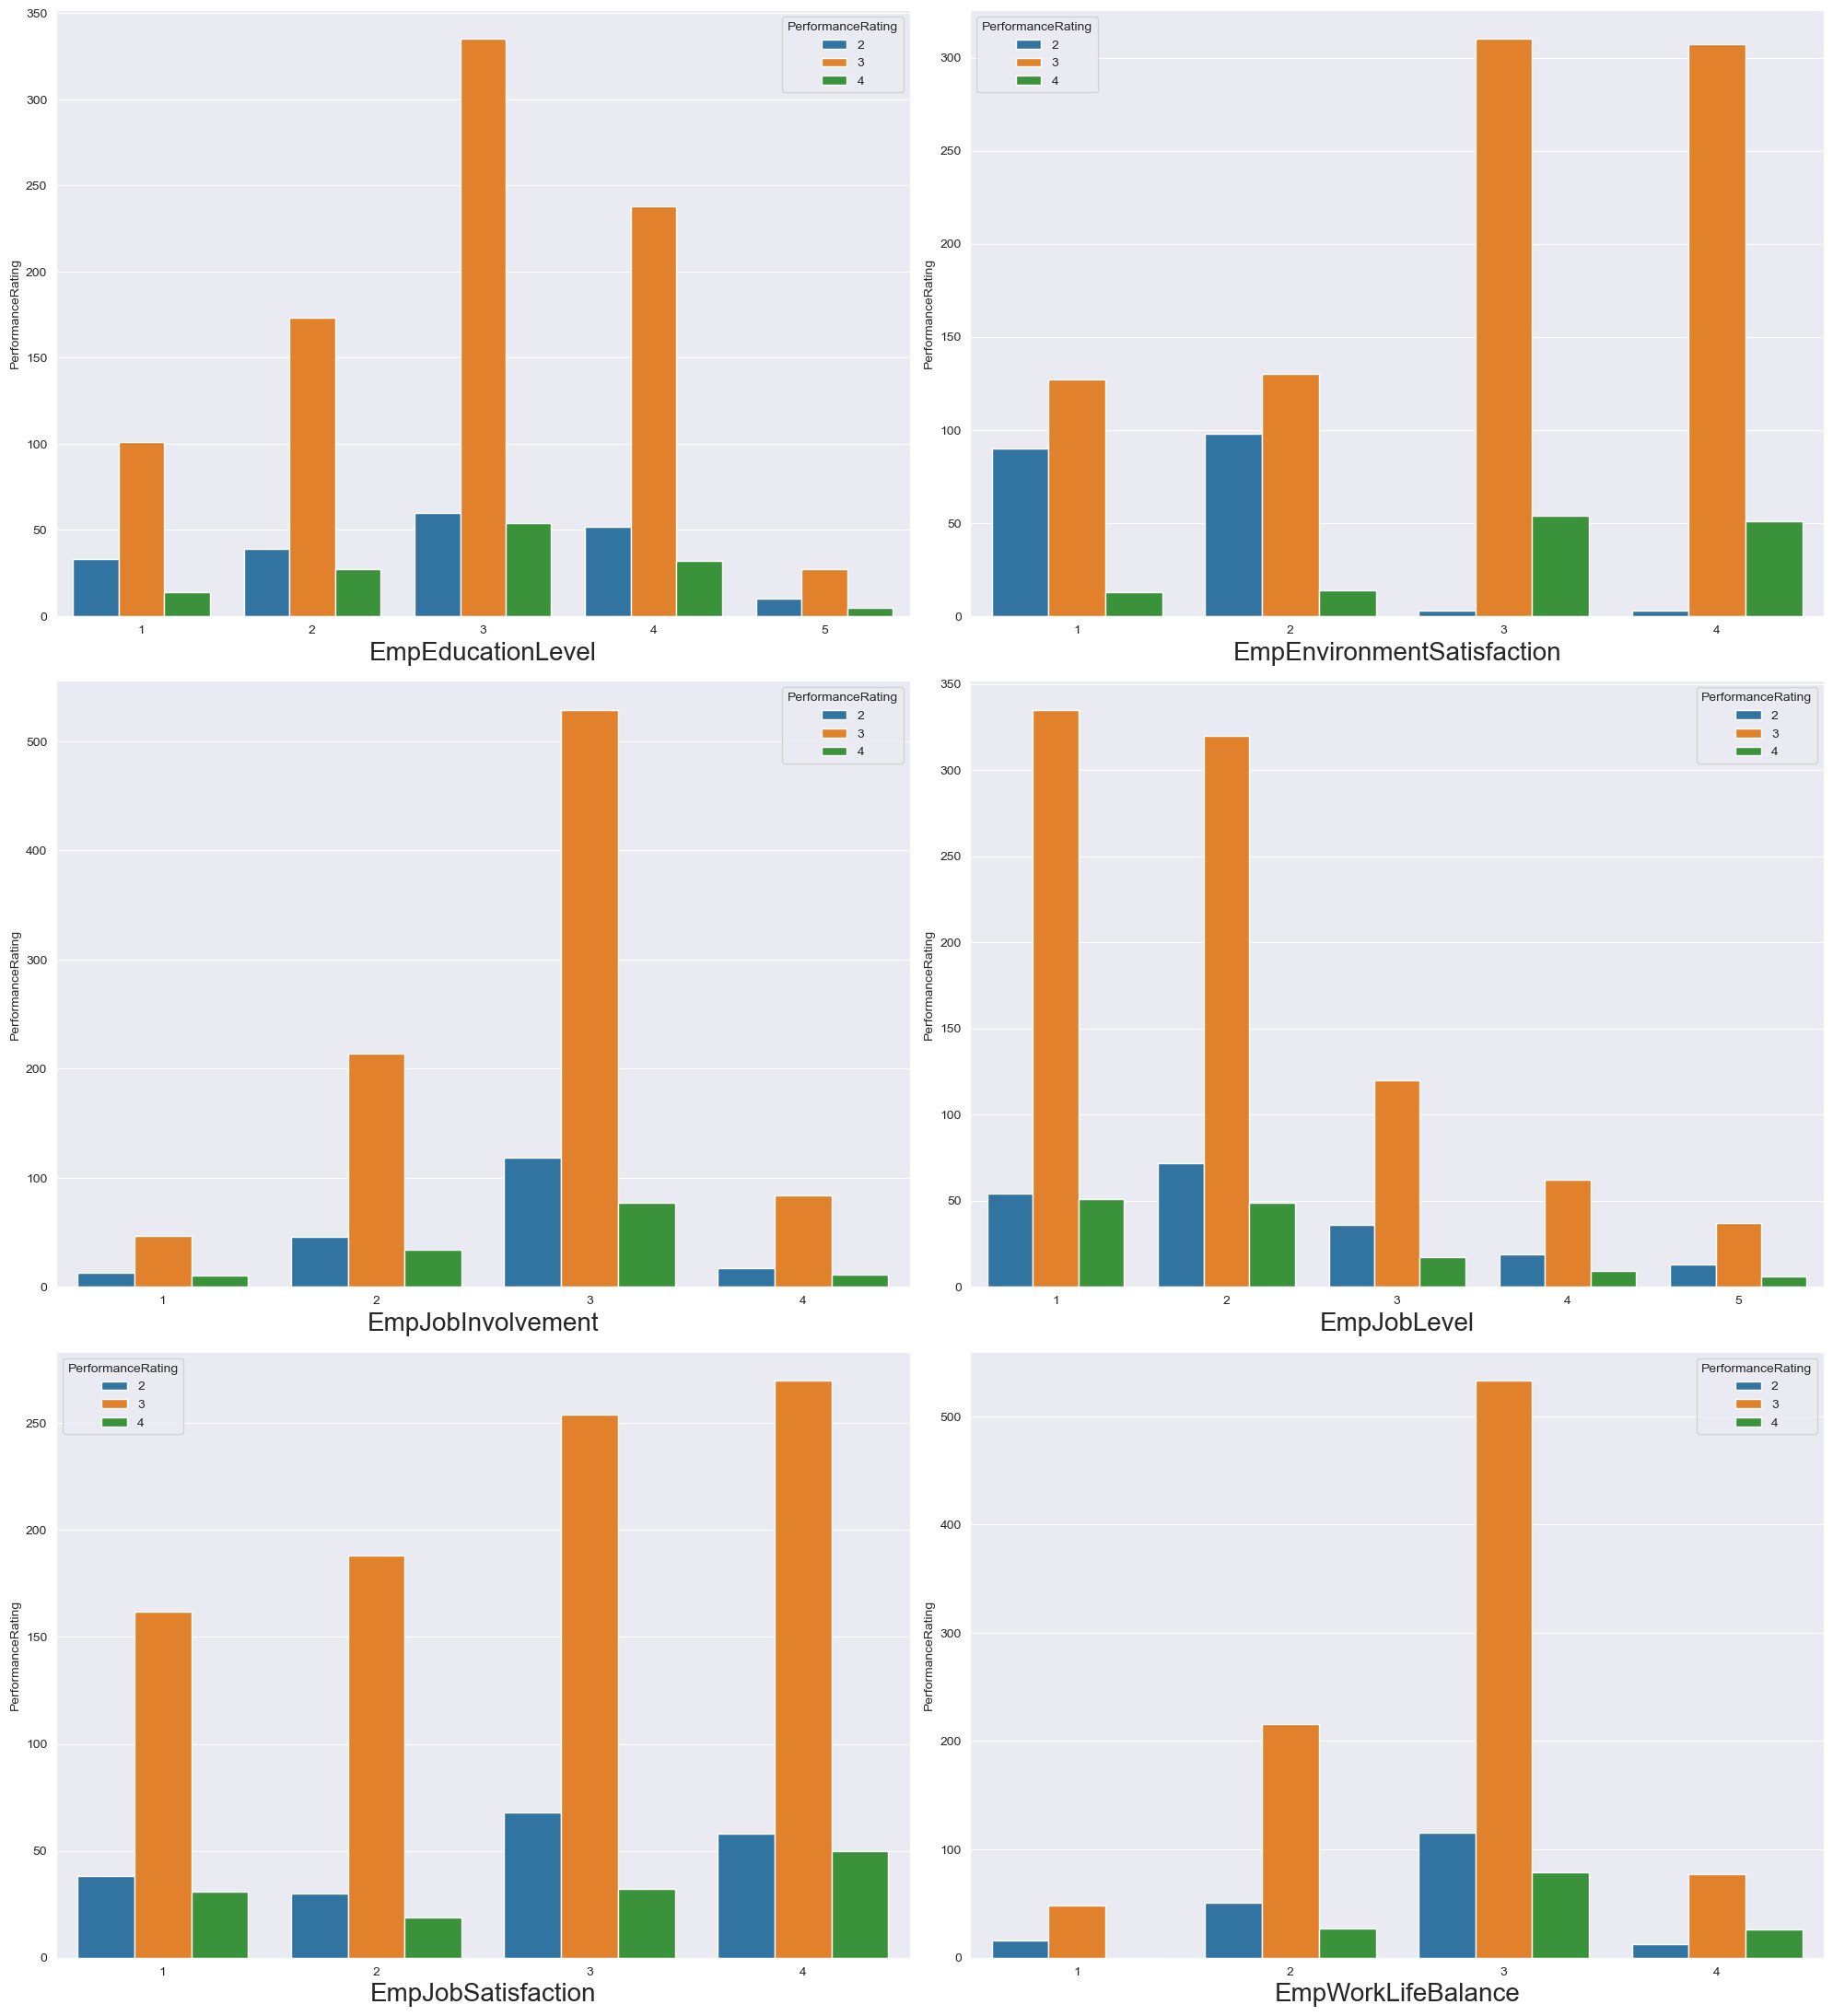

In [118]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) 
plotno = 1

for column in numerical:
    if plotno<=7:    
        plt.subplot(3,2,plotno) 
        sns.countplot(x=numerical[column],hue=data.PerformanceRating) 
        plt.xlabel(column,fontsize=20)  
        plt.ylabel('PerformanceRating')
    plotno+=1 
plt.tight_layout()
plt.show() 


* Those employee education level is [3,4 & 2] this employee have 3 peformance rating mostly
If the performance rating is 2 & 4 then all eduaction level employee is less than 60.
* Maximum no of employee enviorment statifaction is 3 and 4 with 3 performance rating.
If the employee enviorment satisfaction is 1 & 2 that time the maximum employee have 2 performace rating.
If the employee enviorment satisfaction is increases that time 4 performance rating also increases.
* Those employee job involvement is 2 & 3 this empluee have 3 performance rating mostly
2 & 4 performance rating eployee is less in all job involvment.
* If the employee job level is 1,2 & 3 that time most of the employee have 3 performance rating
In all job levels 2 & 4 performance rating of all emplyee is less than 60.
* Maximum 4 & 3 job satisfaction employee get 3 performance rating most of the time.
In all job satisfaction 2 & 4 performance rating is less than 55 employee
* If the employee work life balance is 3 that time maximum no of employee have 3 performance rating.
If the work life balance is 1 that time no one get 4 performance rating.

### MULTIVARIATE ANALYSIS

### relationship between Age & Total work experiance with respect to target feature

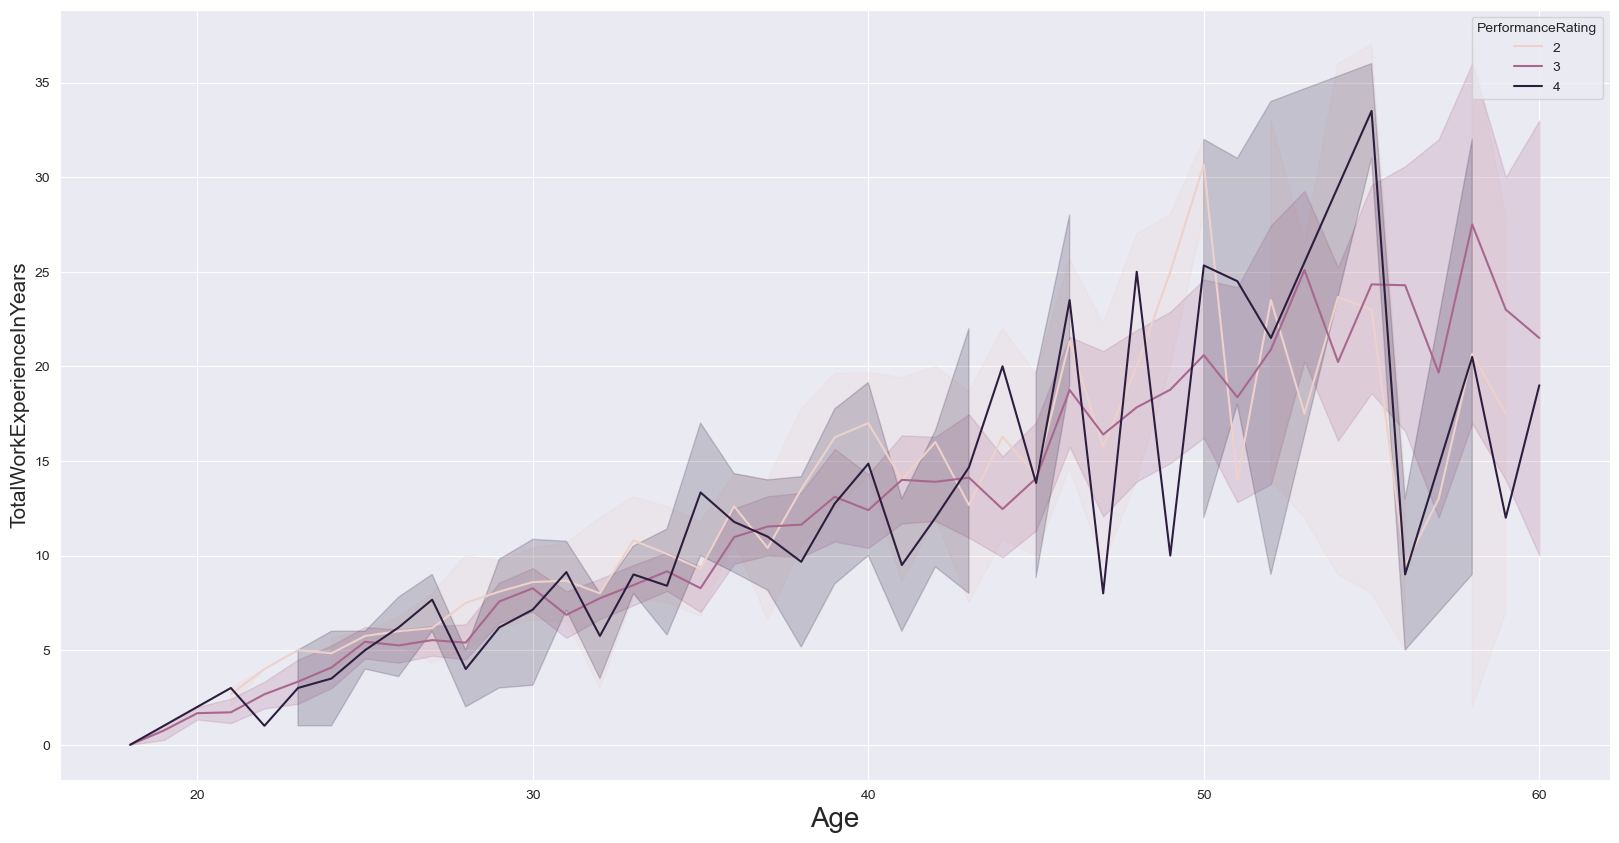

In [119]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating,data=data)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

* If the age & total experiance is increases that time most of the employee performance rating is 4.
* Low age and minimum year experiance employee also 4 perfomace rating.
* At the age of 50 and 30 years of experiance employee have 2 performance rating.

### relationship between Gender & Number Companies Worked with respect to target feature

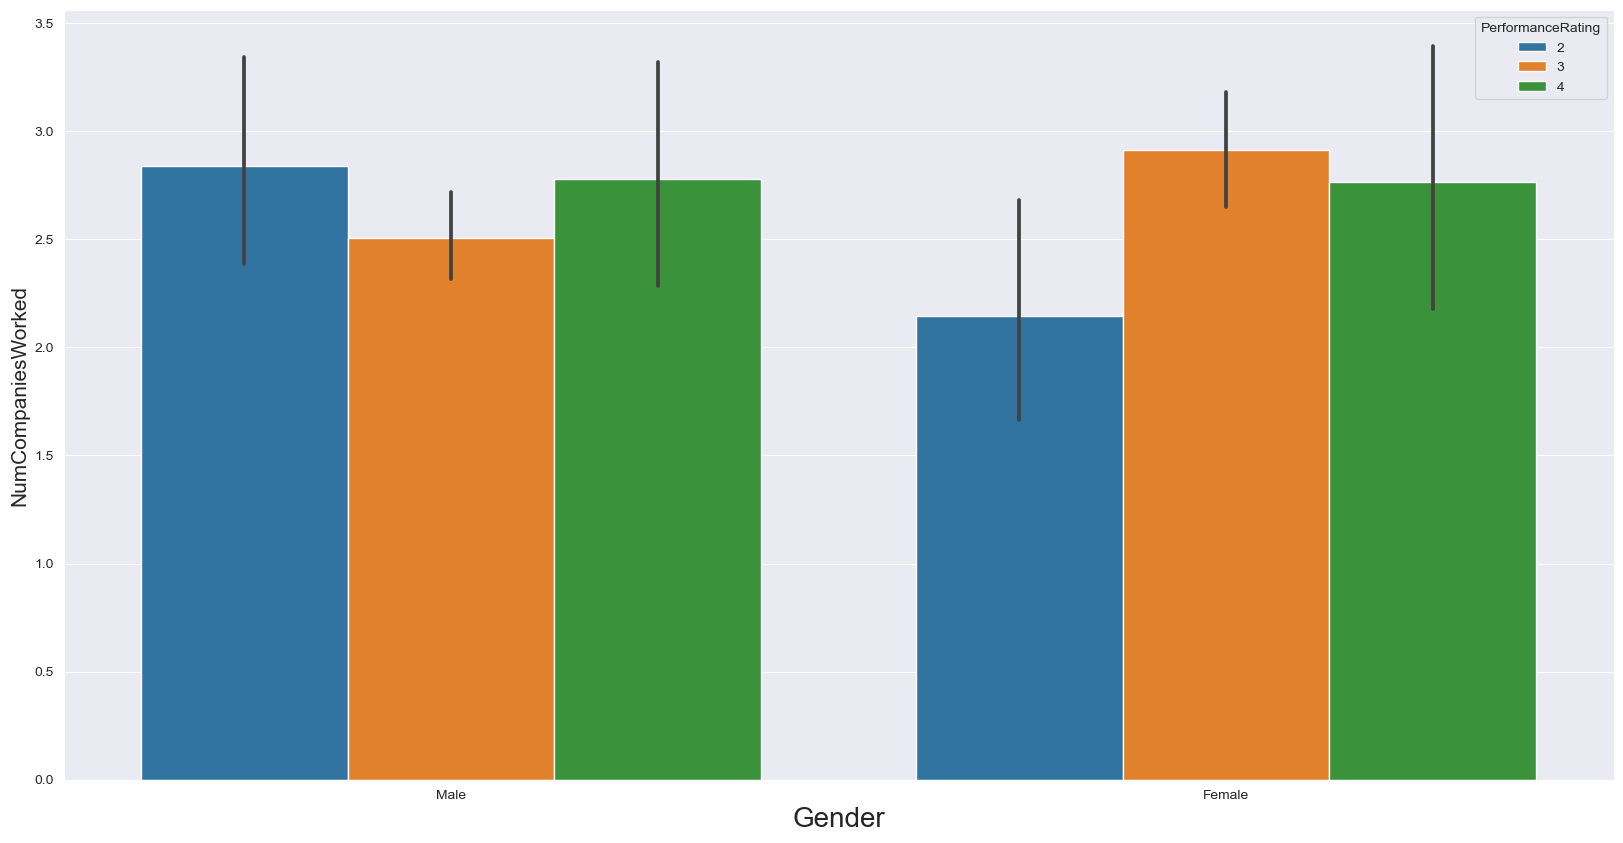

In [120]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

* If the gender is male and no of companies work is increses that time most of the performance rating is 2 & 4.
* If female work in less no companies that time performance rating is 2.
* 3 & 4 performance rating in female increase if the no of compaines worked is increses.

### relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

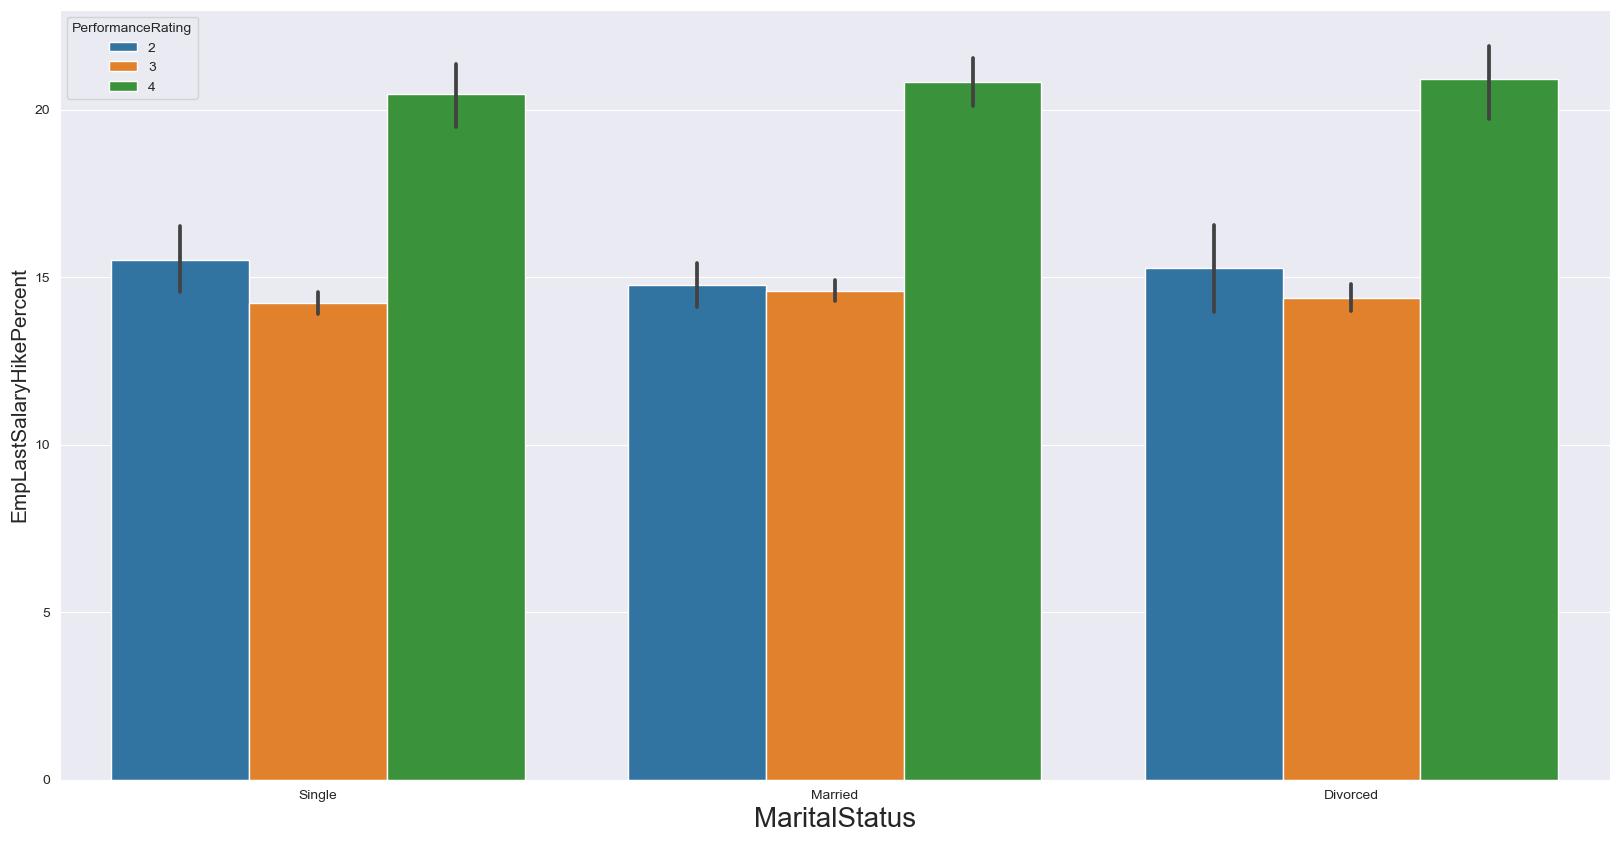

In [121]:
plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

* In all marital status with maximum salary hike percent in last year is increases that time performance rating is 4.
* If salary hike percentage in last year is less than 15 that time performance rating is 2 & 3 in all marital status.

###  the relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature

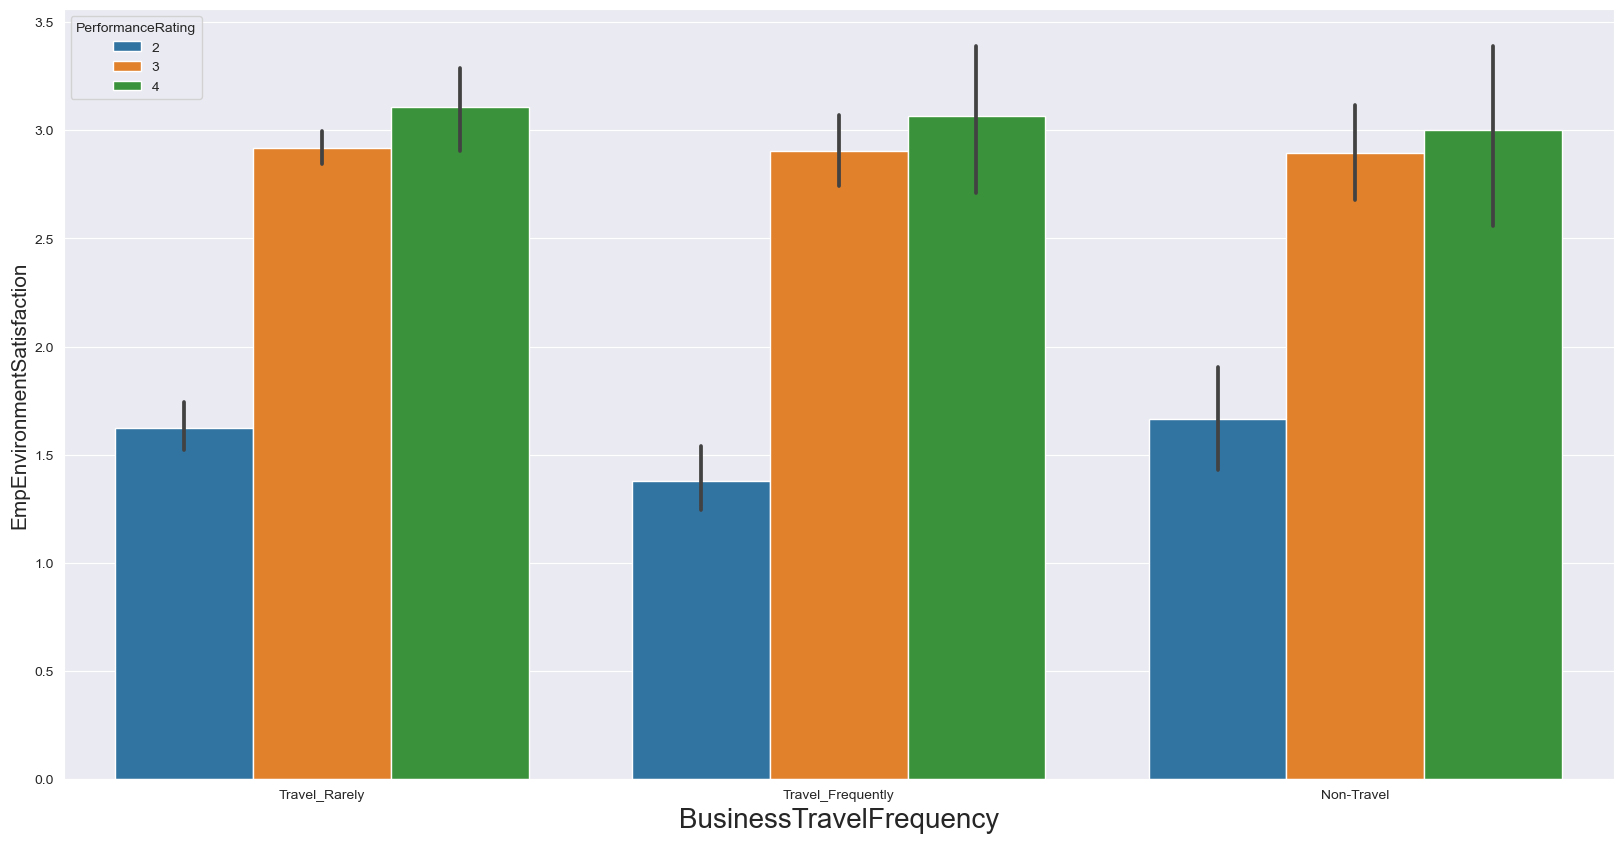

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

* If the employee enviorment satisfaction is high that time performance rating is 3 & 4 in all buisness travel frequency.
* Low employee enviorment satisfaction has 2 performance rating in all buisness travel frequency.

### the relationship between Attrition & YearsWithCurrManager with respect to target feature

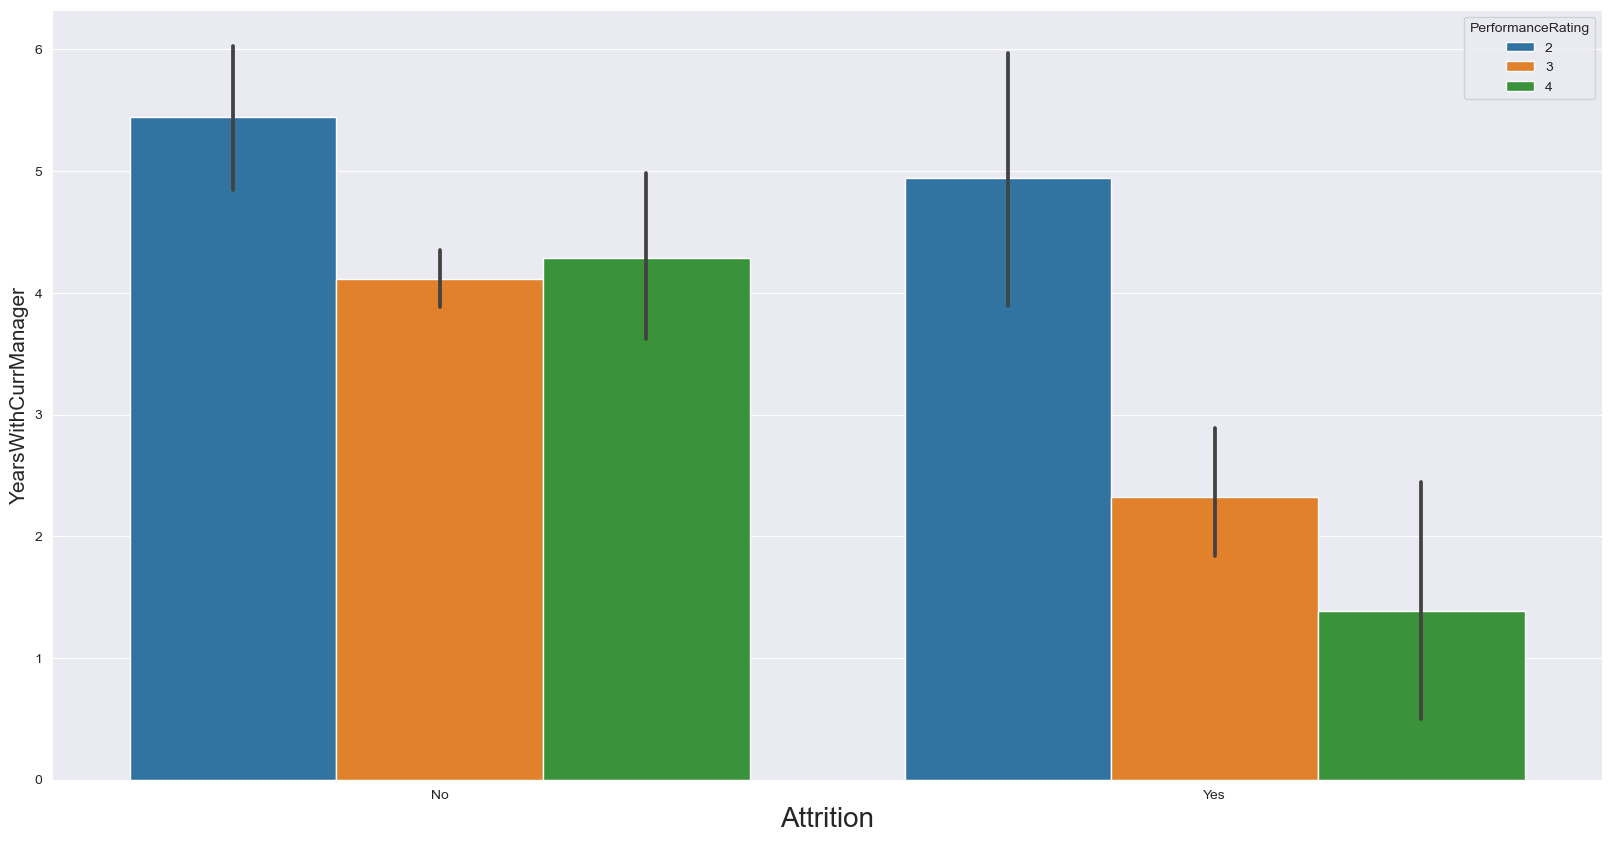

In [123]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

* If the employee current manager year is increses that time performance rating is 2 and 50-50% chances of employee to leave the company.
* those employee perfomance rating is 4 and current manger year is increases that time most of the employee not leave the company.

### the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature

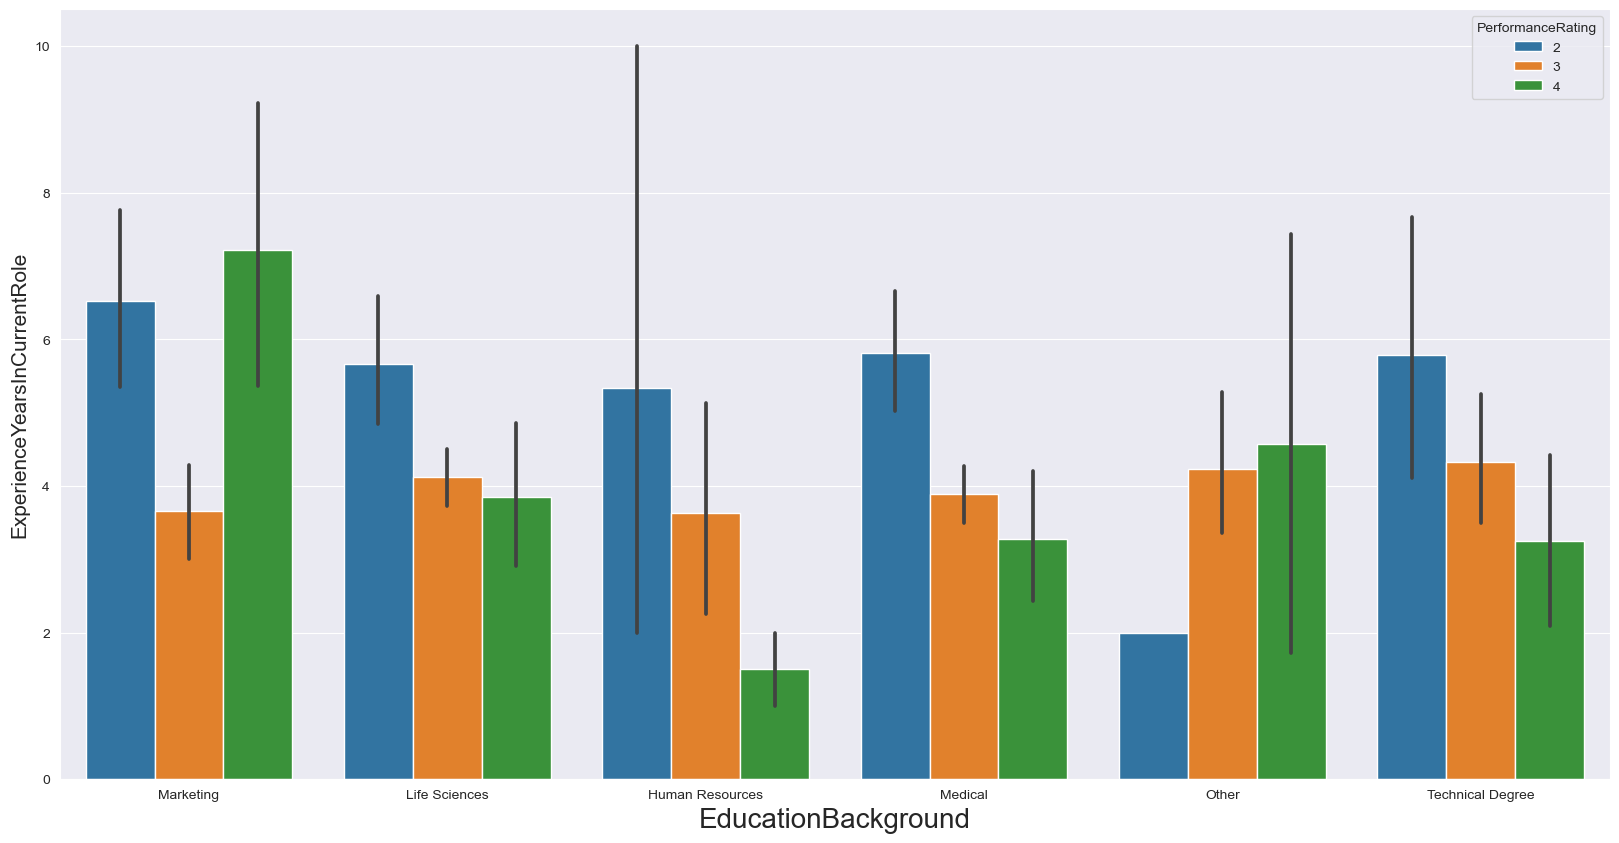

In [124]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

* If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
* In all education background with current role experiance is more than 5 then the performance rating of employee is 2.
* Life scineces, Medical, others , and technical degree education background employee has less than 4 year of experiance in current role that time performance rating is 3 & 4.

###  the relationship between OverTime & DistanceFromHome with respect to target feature

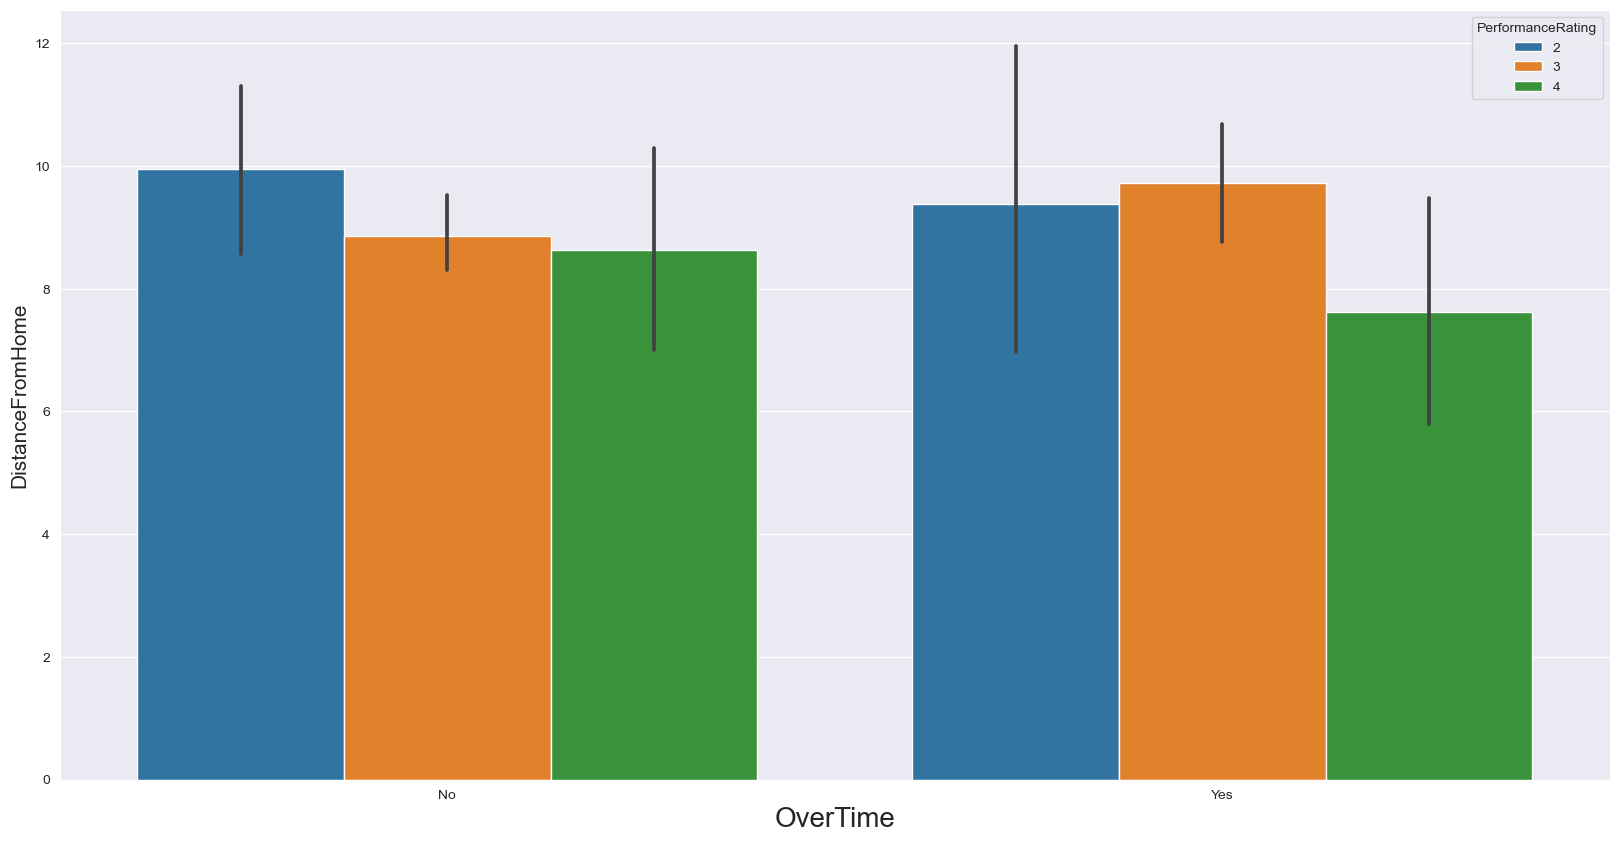

In [125]:
plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=data.PerformanceRating,data=data)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

* If the distance from home is increses that time performance rating is constant with employee doing overtime as well as not doing overtime.

###  the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature

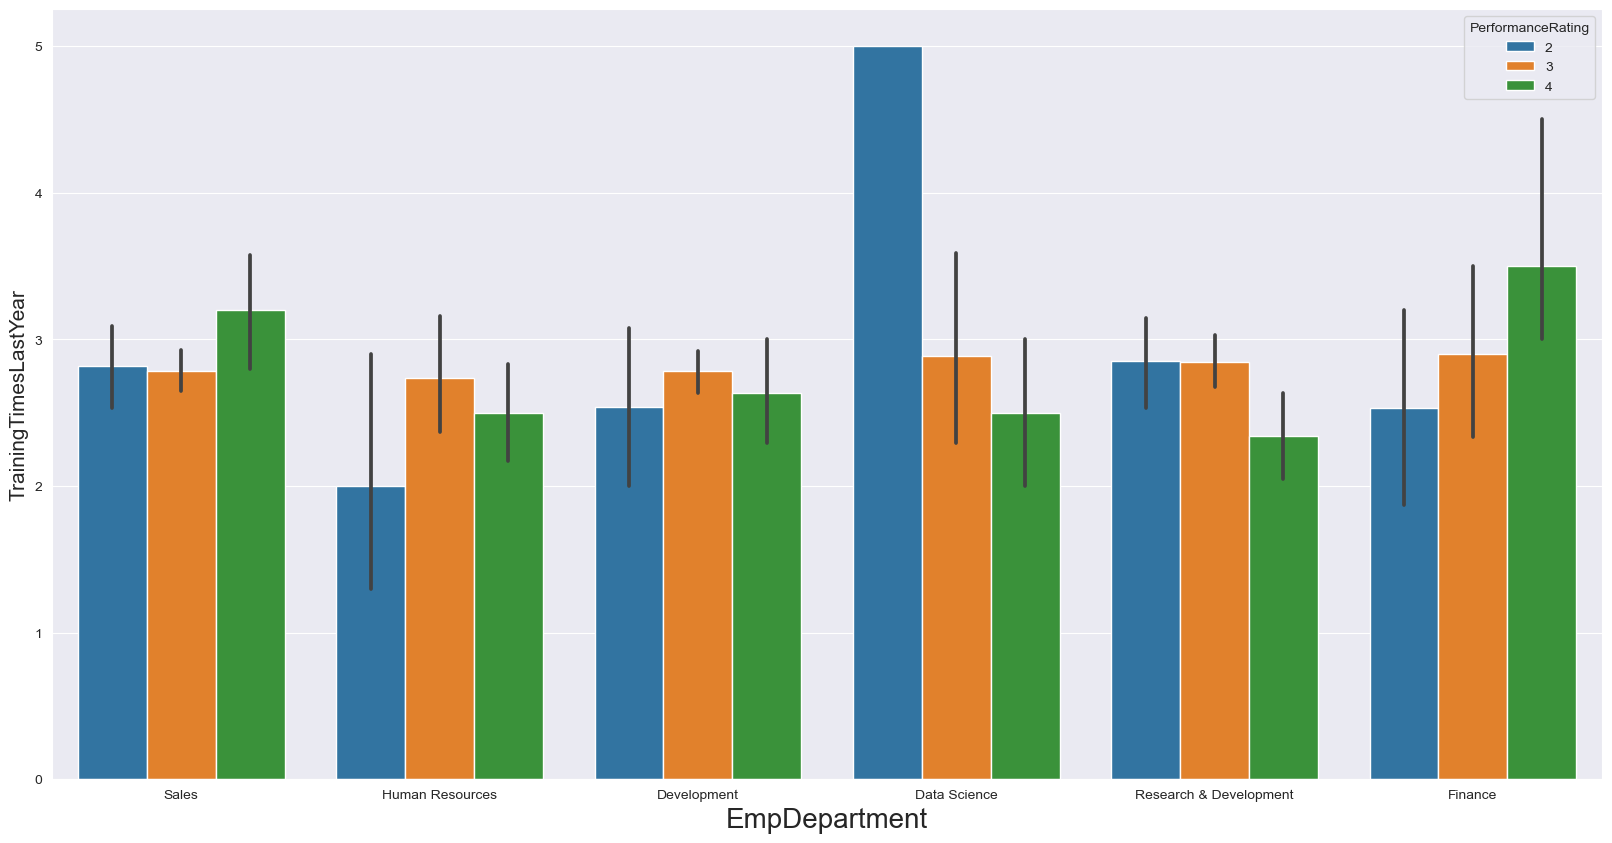

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

* If the employee from data science department and most training time in last year then the performance rating is 2 maximum time.
* Other all employee department with less than 3 time training in last year then the peroformance rating is constant.

### the relationship between Attrition & NumCompaniesWorked with respect to target feature

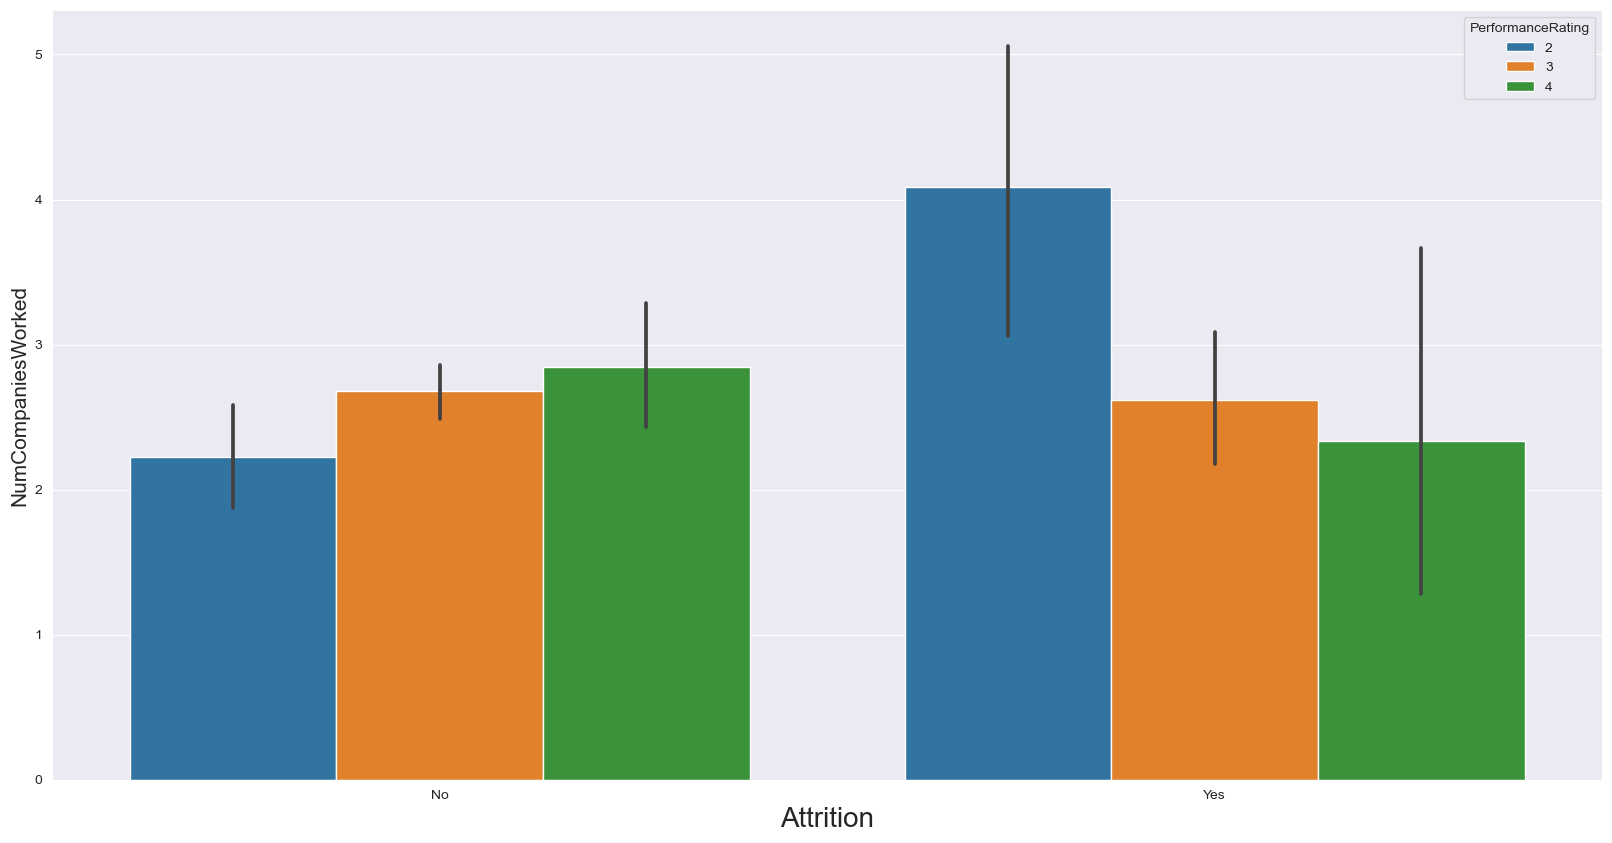

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

* If emplyee number of companies worked is increses that time most of the employee leave the company and their performance rating is 2
* Those employee have work in less no of companies they are not leave the company and their performance rating is constant.

## CHECKING THE DISTRIBUTION PLOT 


In [19]:
# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


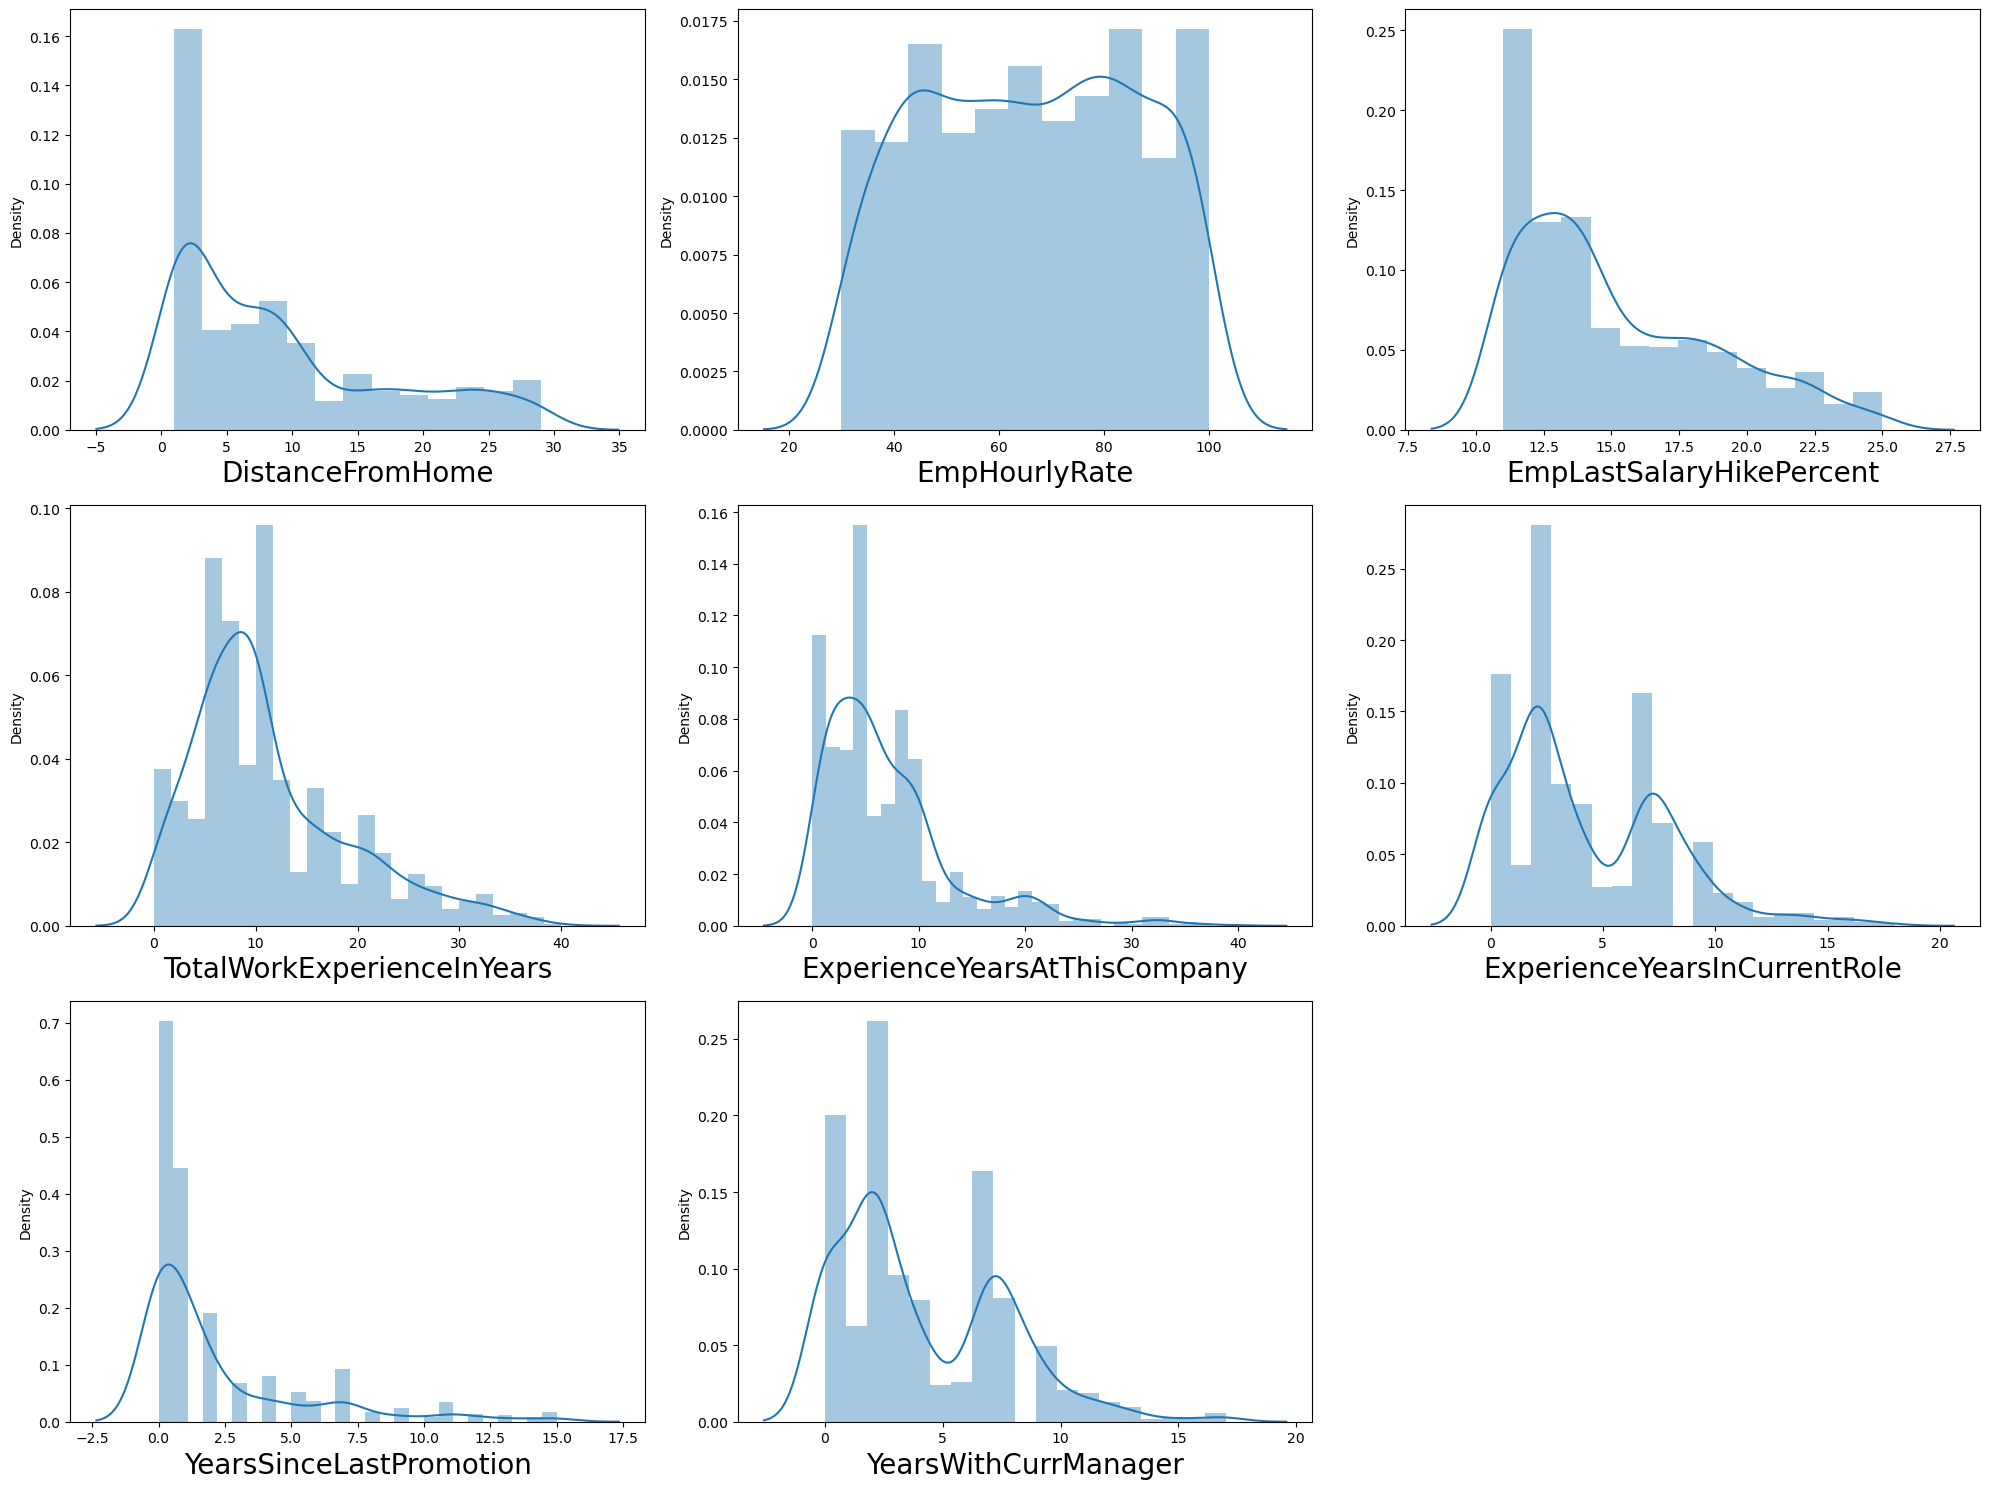

In [20]:
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) 
plotno = 1 

for column in continuous:  
    if plotno<=8:  
        plt.subplot(3,3,plotno) 
        sns.distplot(x=continuous[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1
plt.tight_layout()
plt.show() 


### CHECK THE SKEWNESS 


**Skewness:**
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness



In [21]:
print('1.Distance From Home Feature Skewness:',data.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',data.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',data.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',data.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',data.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',data.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',data.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',data.YearsWithCurrManager.skew())


1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


* From above all Feature skewness only one feature Year Since Last Promotion have skew

###  CHECK THE KURTOSIS



**Kurtosis**:
kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [22]:
print('1.Distance From Home Feature kurtosis:',data.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',data.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',data.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',data.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',data.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',data.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',data.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',data.YearsWithCurrManager.kurtosis())


1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


* From above all Feature kurtosis only high in two features experiance year at this company & Year Since Last Promotion have kutosis

## DATA PRE-PROCESSING & FEATURE SELECTION:

### CHECK MISSING VALUE

In [31]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* Their is no missing value present in the data.

#### CONVERT CATEGORICAL TO NUMERICAL

In [32]:
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

### Gender

In [33]:
data.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [34]:
data.Gender = data.Gender.map({'Male':1,'Female':0})

### Education Background

In [35]:
data.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [36]:
#Frequency Encoding
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [37]:
data.EducationBackground.value_counts()

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64

### Marital Status

In [38]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [39]:
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [40]:
data.MaritalStatus.value_counts()

MaritalStatus
2    548
1    384
0    268
Name: count, dtype: int64

### Employee Department

In [41]:
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [42]:
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [43]:
data.EmpDepartment.value_counts()

EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64

### Employee Job Role

In [44]:
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [45]:
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [46]:
data.EmpJobRole.value_counts()

EmpJobRole
18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: count, dtype: int64

### Business Travel Frequency

In [47]:
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [48]:
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [49]:
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

### Overtime

In [50]:
data.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [51]:
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [52]:
data.OverTime.value_counts()

OverTime
1    847
0    353
Name: count, dtype: int64

### Attrition

In [53]:
data.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [54]:
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [55]:
data.Attrition.value_counts()

Attrition
1    1022
0     178
Name: count, dtype: int64

## CHECK OUTLIERS

### Box Plot

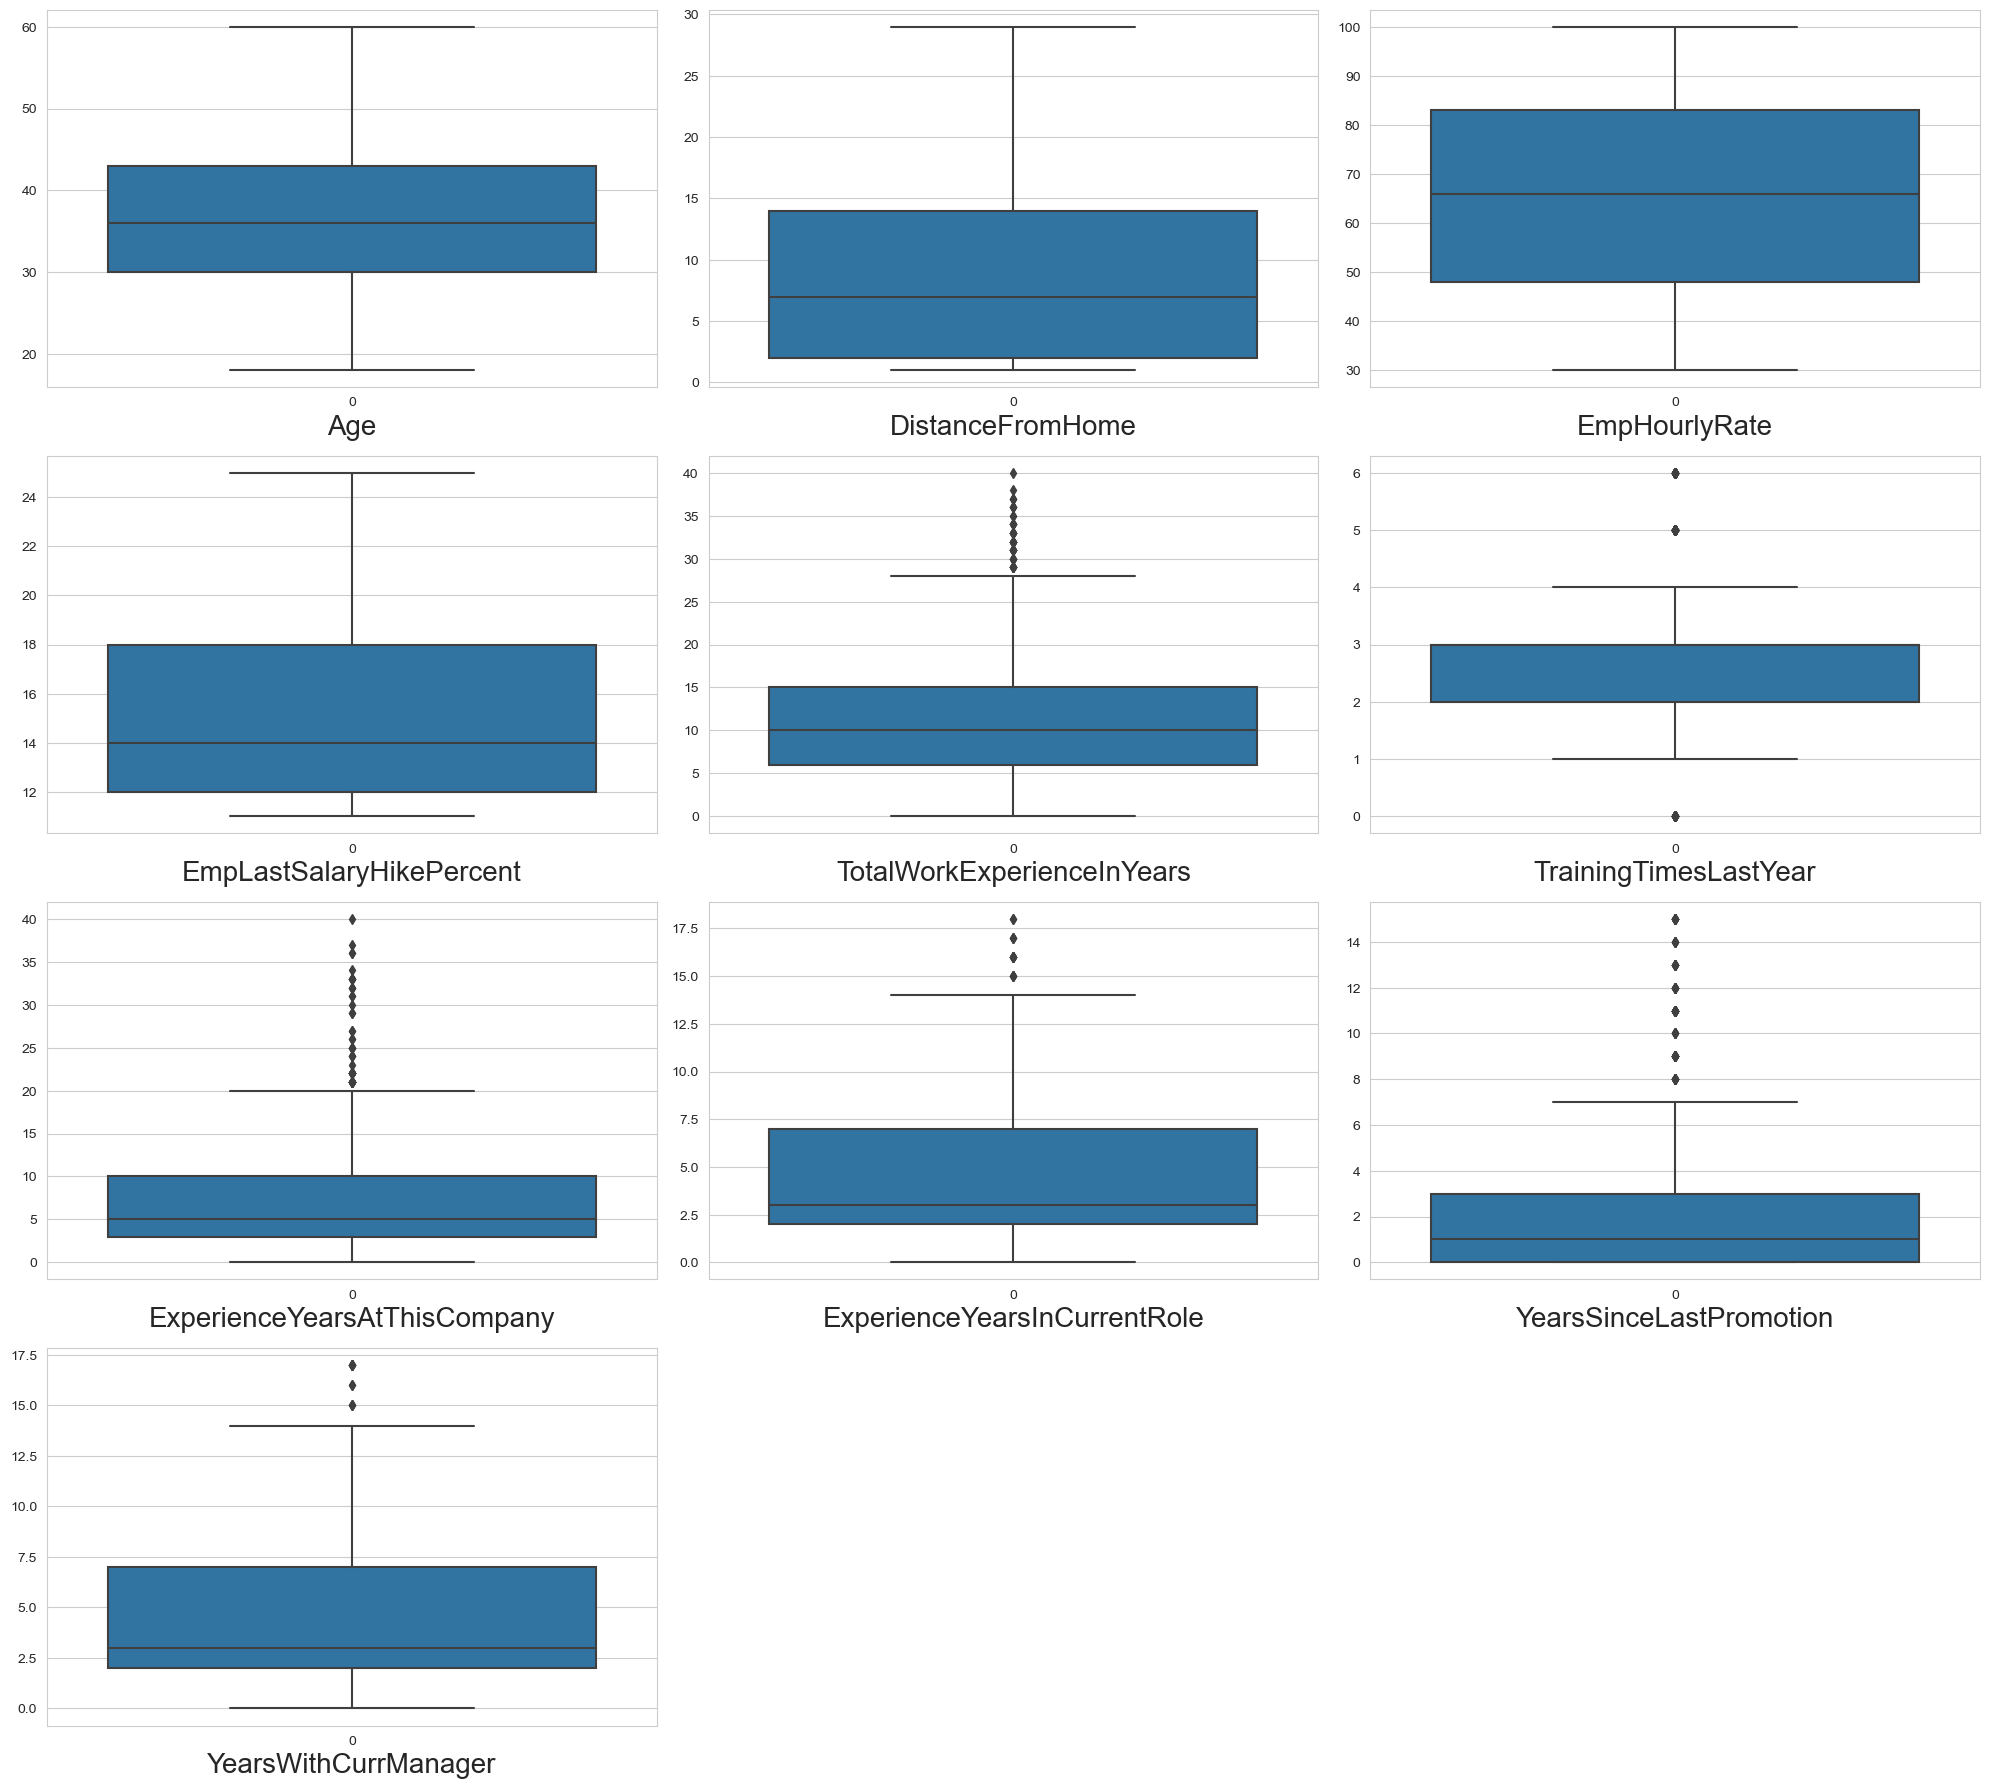

In [56]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) 
plotno = 1 

for column in out:  
    if plotno<=12:   
        plt.subplot(4,3,plotno) 
        sns.boxplot(out[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1
plt.tight_layout()
plt.show() 

**IQR:**

IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

### Total Work Experiance in year

In [57]:

iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [58]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [59]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Training Times Last Year

In [60]:
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [61]:
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [62]:
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [63]:
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Experience Years At This Company

In [64]:
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [65]:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [66]:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Experience Years In Current Role

In [67]:
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [68]:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [69]:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Years Since Last Promotion

In [70]:
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [71]:
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [72]:
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### Years With Current Manager

In [73]:
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [74]:
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [75]:
data.loc[data['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### CHECKING OUTLIER AFTER IMPUTATION

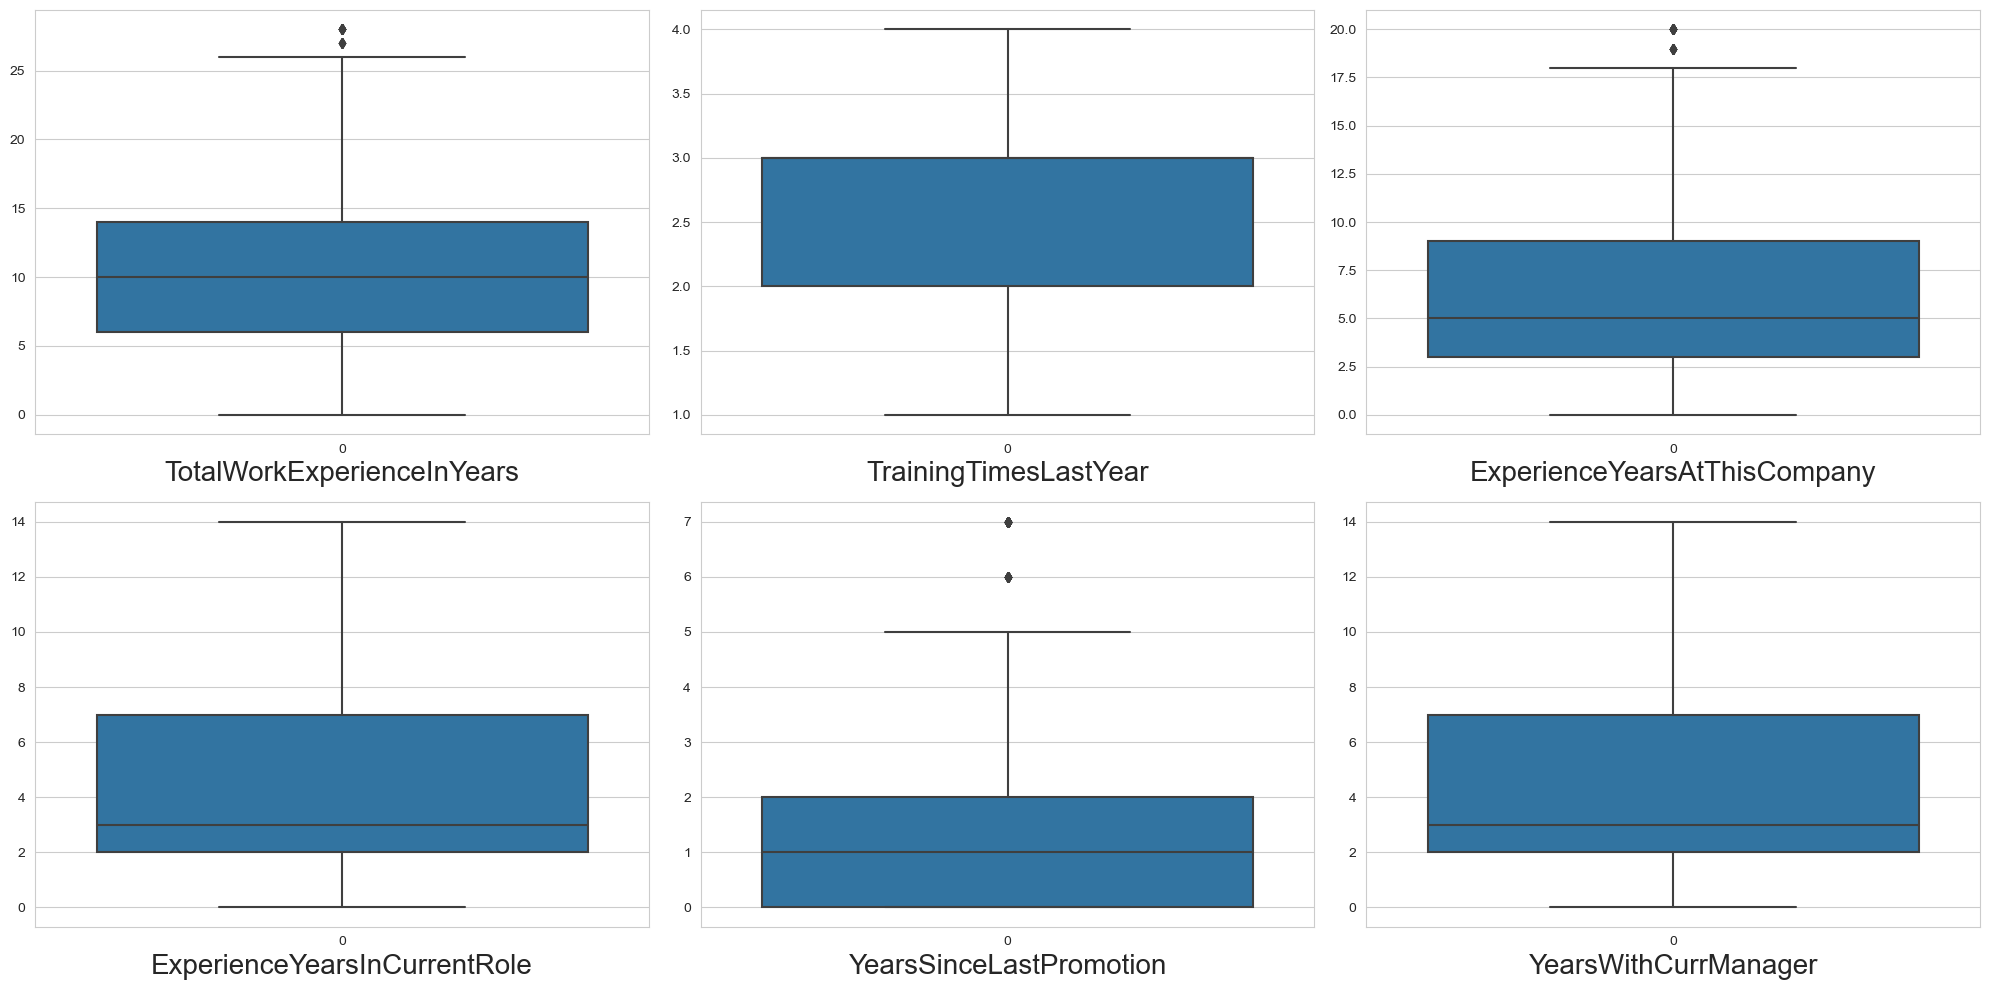

In [76]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) 
plotno = 1 

for column in out:
    if plotno<=7:    
        plt.subplot(2,3,plotno) 
        sns.boxplot(out[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1 
plt.tight_layout()
plt.show()

### FEATURE TRANSFORMATION

*  the year since last promotion feature have some skewed in data,

**Q-Q Plot:**
    Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

In [78]:
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

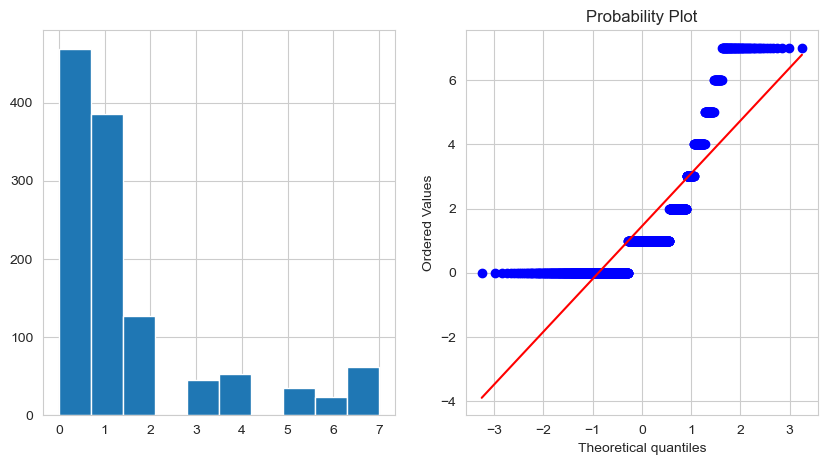

In [79]:
plot_data(data,'YearsSinceLastPromotion')

#### SQUARE ROOT TRANSFORMATION

In [80]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

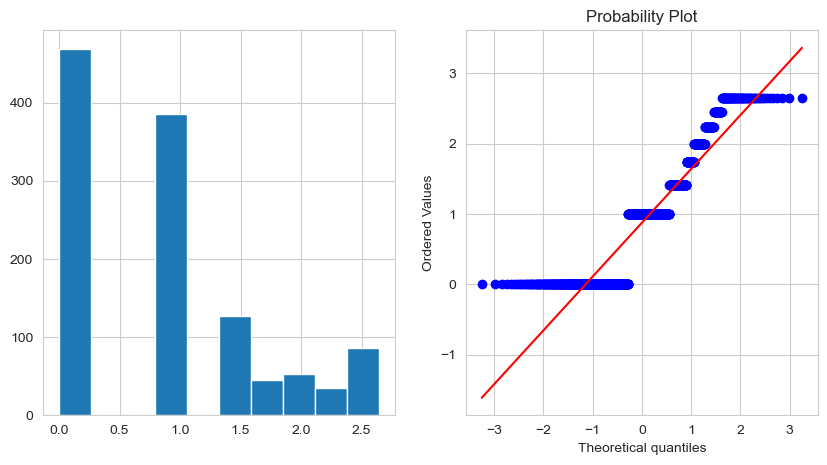

In [81]:
plot_data(data,'square_YearsSinceLastPromotion')

## SCALING THE DATA

In [82]:
scalar = StandardScaler() 

data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [83]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3,-1.057559
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3,0.151501
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4,0.151501
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3,0.151501
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3,0.652311


### FEATURE SELECTION

### Keeping Unique Features

In [84]:
data.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

### CORRELATION

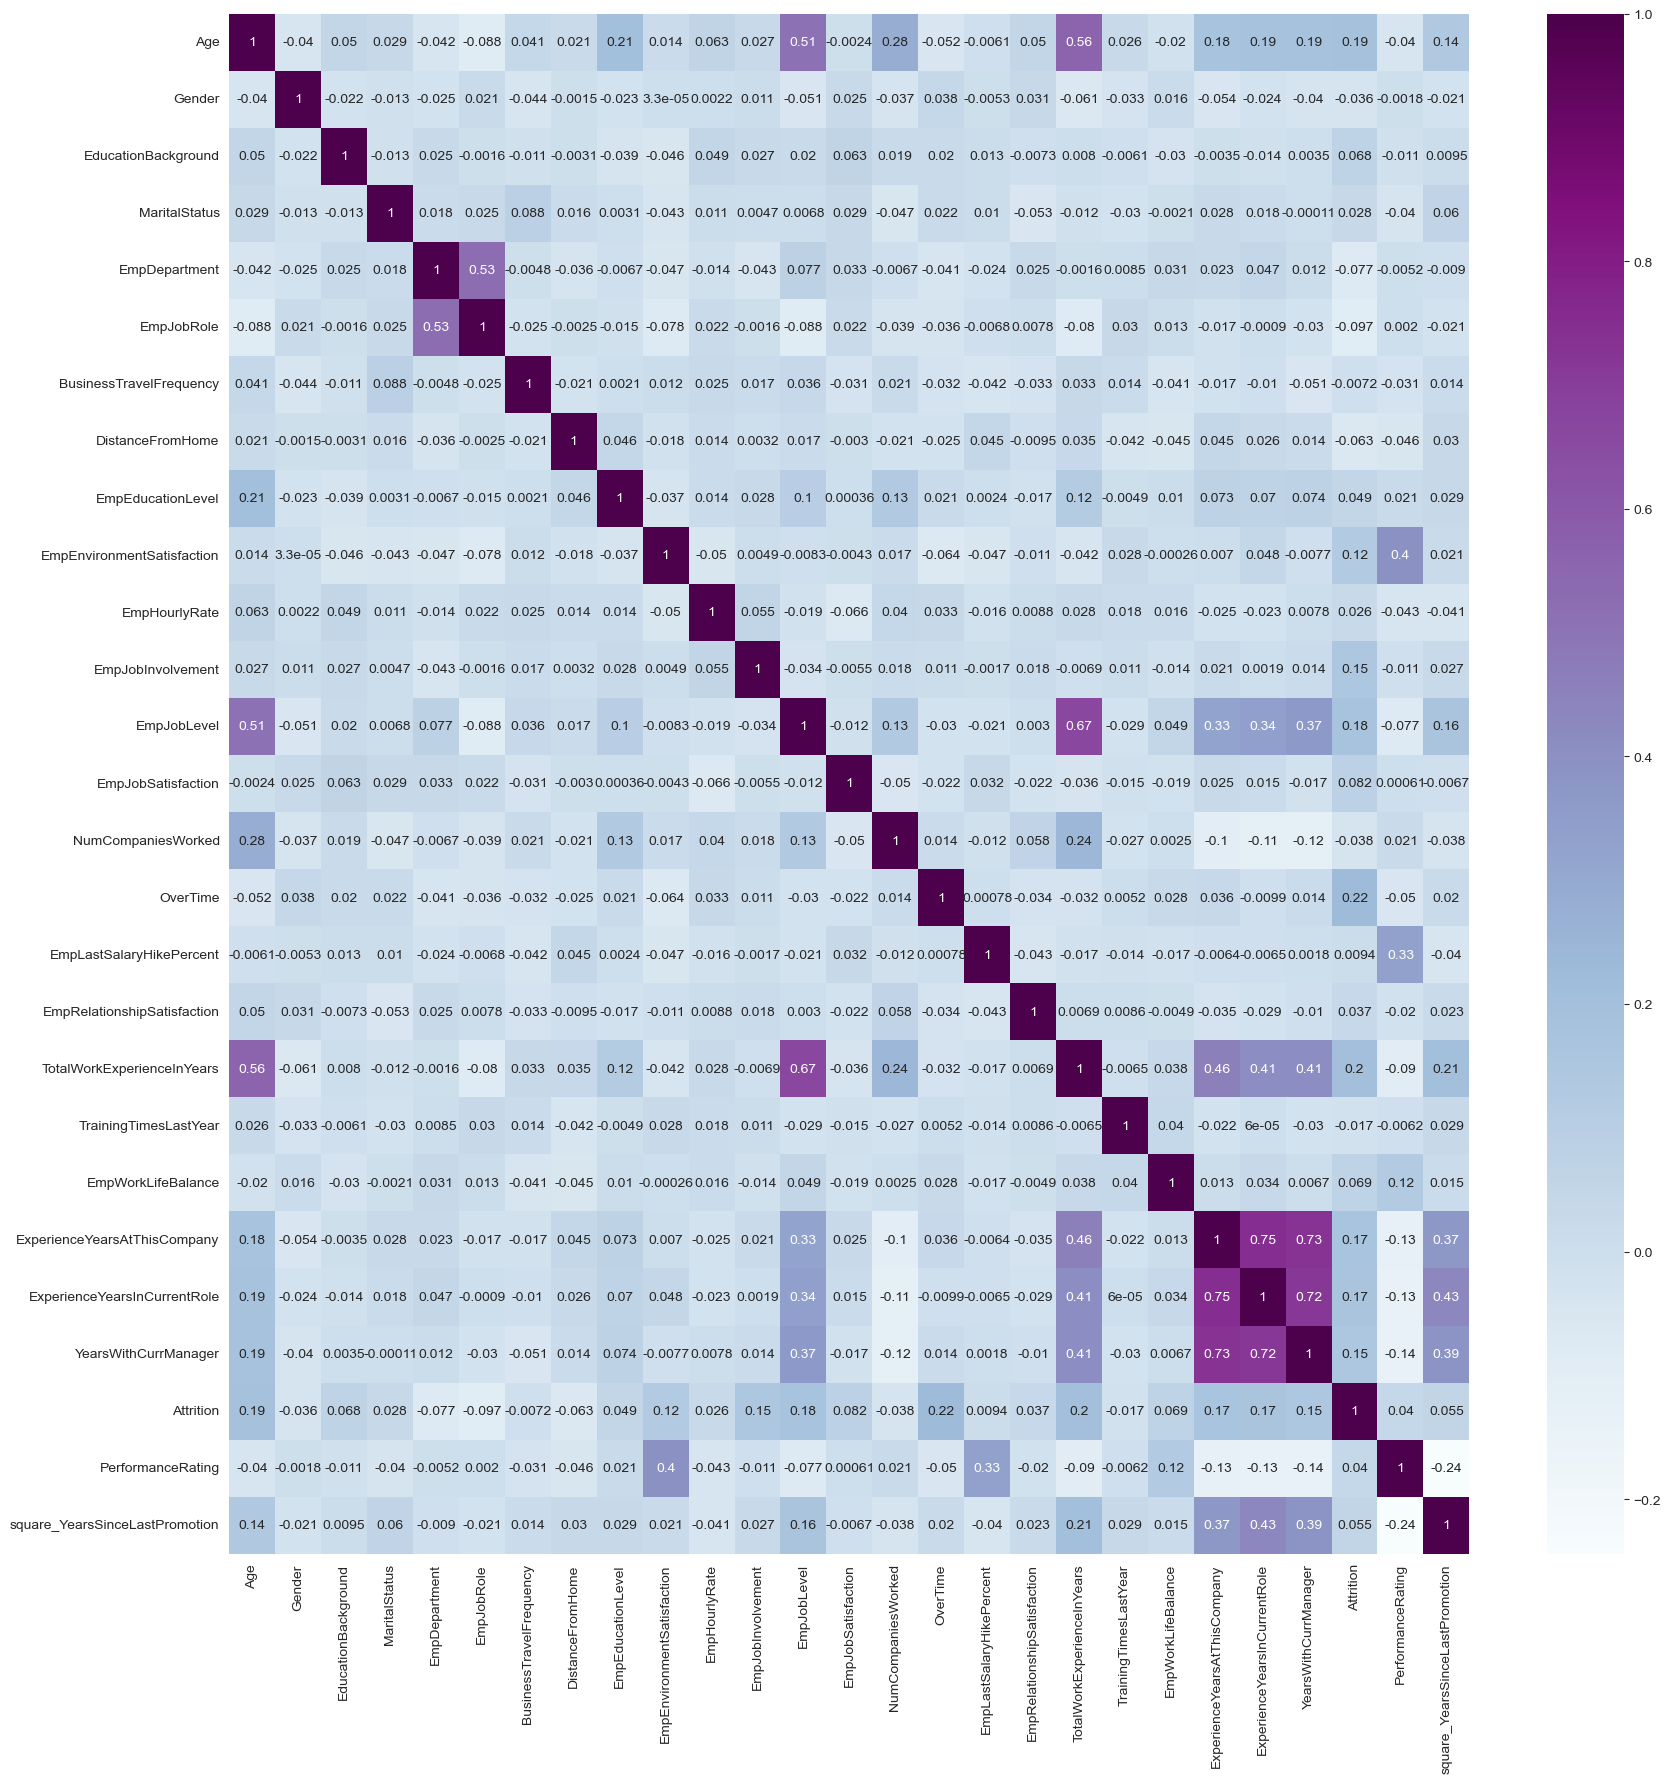

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

*  the their is no highly correlated feature in data

In [86]:
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


### CHECKING DUPLICATES

In [87]:
data.duplicated().sum()

0

Their is no Duplicates is present in data.

In [88]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating', 'square_YearsSinceLastPromotion'],
      dtype='object')

## Dimensionality Reduction

#### PRINCIPLE COMPONENT ANALYSIS

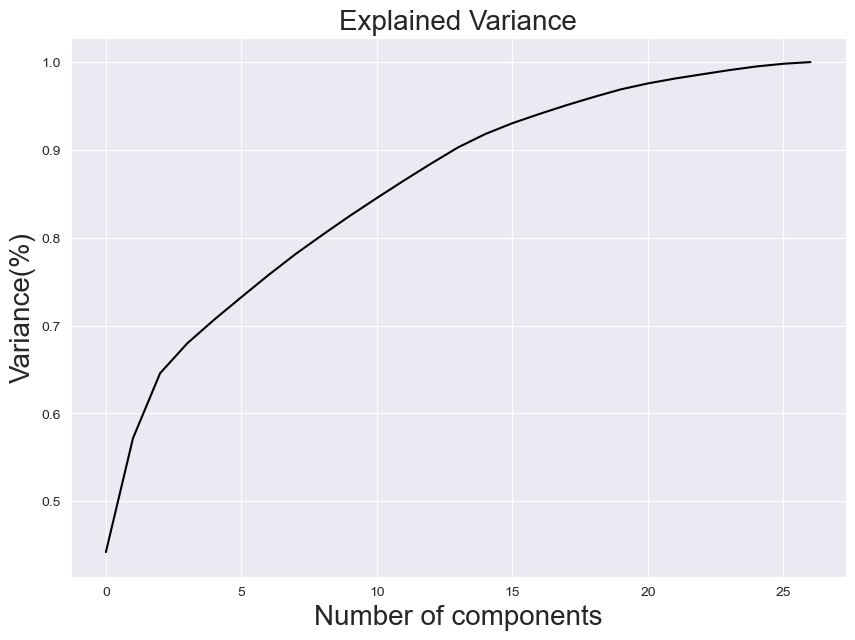

In [89]:
pca = PCA()
principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) 
plt.title('Explained Variance',fontsize=20)
plt.show()

 * It shows the 25 features has less varaince loss, so  select 25 feature.

In [90]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

array([[-4.47979357e+00, -1.62579961e+00,  1.04815246e+00, ...,
        -5.02890736e-01,  2.28337153e-01, -3.52744289e-01],
       [-4.35607380e+00, -6.82890846e-02,  2.01617388e+00, ...,
        -8.88367129e-01, -2.37235986e-01, -7.10042471e-01],
       [-4.24318059e+00,  2.56096162e+00,  4.36307191e+00, ...,
        -4.34724440e-01, -3.56723825e-01,  6.46996038e-01],
       ...,
       [ 1.64245087e+00, -1.73309807e+00,  3.13585566e+00, ...,
        -1.70950647e-01,  3.39096853e-01,  1.12605457e+00],
       [ 9.10590984e+00, -2.09875367e+00,  1.48314921e+00, ...,
         6.10226389e-01,  1.08399769e-02, -2.99560396e-01],
       [-4.36428097e+00,  5.98213577e+00, -2.10105411e+00, ...,
         6.48347080e-01, -7.17937795e-03, -2.95697975e-02]])

#### CREATE NEW DATAFRAME

In [91]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### Dimension

In [128]:
principle_df.shape

(1200, 26)

### INDEPENDANT & DEPENDANT FEATURES

In [131]:
df1=principle_df

In [132]:
X = df1.iloc[:,:-1]
y = df1.PerformanceRating

In [133]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894


In [134]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

### BALANCING THE TARGET FEATURE

**SMOTE:**
    SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [135]:
 sm = SMOTE() 
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


### SPLIT TRAINING AND TESTING DATA

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) 

In [137]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

### MODEL CREATION, PREDICTION AND EVALUATION

#### Support Vector Machine

In [138]:
svc = SVC()
svc.fit(X_train,y_train)
svc_train_predict = svc.predict(X_train)
svc_test_predict = svc.predict(X_test)

### TRAINING ACCURACY

In [139]:
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 96.56652360515021
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       1.00      0.95      0.97       728
           3       0.91      0.98      0.95       651
           4       0.99      0.97      0.98       718

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



* Svm perform well on training data

### TESTING ACCURACY

In [140]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 95.04761904761905
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.94      0.96       194
           3       0.87      0.98      0.92       153
           4       0.99      0.94      0.97       178

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.96      0.95      0.95       525



### HYPER PARAMETER TUNNING WITH GRID SEARCH CV

In [142]:
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() 
grid = GridSearchCV(model,param_grid,refit=True,verbose=0,scoring='f1',cv=5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1')

#### Best Parameter

In [143]:
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)

### TESTING ACCURACY AFTER HYPERPARAMETER TUNNING

In [144]:
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 98.66666666666667
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.99      0.99       182
           3       0.98      0.98      0.98       172
           4       1.00      0.98      0.99       171

    accuracy                           0.99       525
   macro avg       0.99      0.99      0.99       525
weighted avg       0.99      0.99      0.99       525



In [145]:
conf_matrix = confusion_matrix(y_hat_clf,y_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[181   1   0]
 [  3 169   0]
 [  0   3 168]]
